<a href="https://colab.research.google.com/github/pemooney1/Data-Science-Projects/blob/main/MooneyPeter_INNHotels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

In [ ]:
# mount the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Overview

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/PGP-DS_UT/4 - Classification/Project_4/INNHotelsGroup.csv')
# returns the first 5 rows
df = df_original.copy()
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
df.shape

(36275, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
#let's see which features have missing values and how many they have
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df['Booking_ID'].duplicated().sum()

0

In [ ]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [ ]:
df.describe(include = 'O').T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

Observations:
- There appear to be no missing values in the data
- The majority of features are categorical features
- There are no duplicate Booking ID's

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate - Continuous Features

These can be understood as features that are not categorical in their nature. Even if they are labeled as a number, these features operate under a continuous scale.

In [ ]:
#create a funciton to plot the boxplot and histogram of our features
def histogram_boxplot(data, column_name):
    # Create a figure with two subplots stacked vertically
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Plot the boxplot on the first subplot
    sns.boxplot(x=data[column_name], ax=ax1)
    ax1.set_title(f'Boxplot for: {column_name}')

    # Plot the histogram on the second subplot
    sns.histplot(data[column_name], kde=True, ax=ax2)
    ax2.set_title(f'Histogram for: {column_name}')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

#### Lead Time

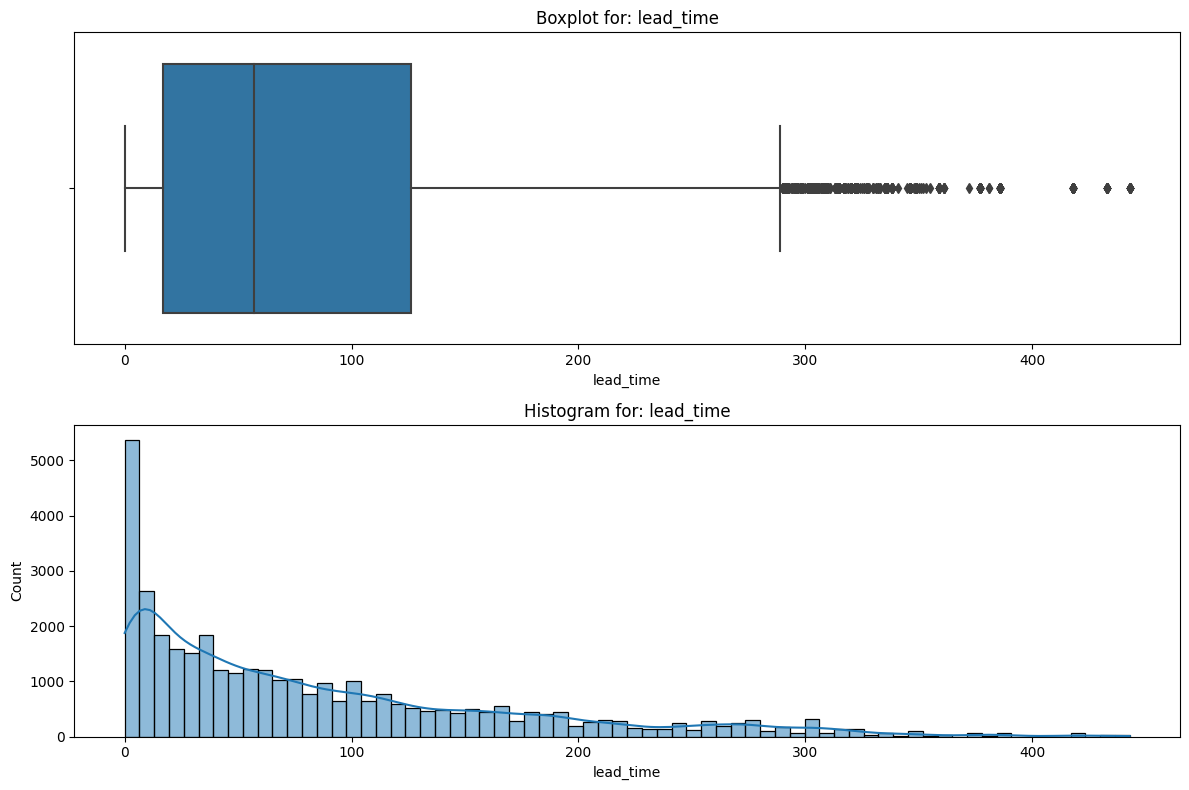

In [ ]:
histogram_boxplot(df, 'lead_time')

#### Average Price per Room

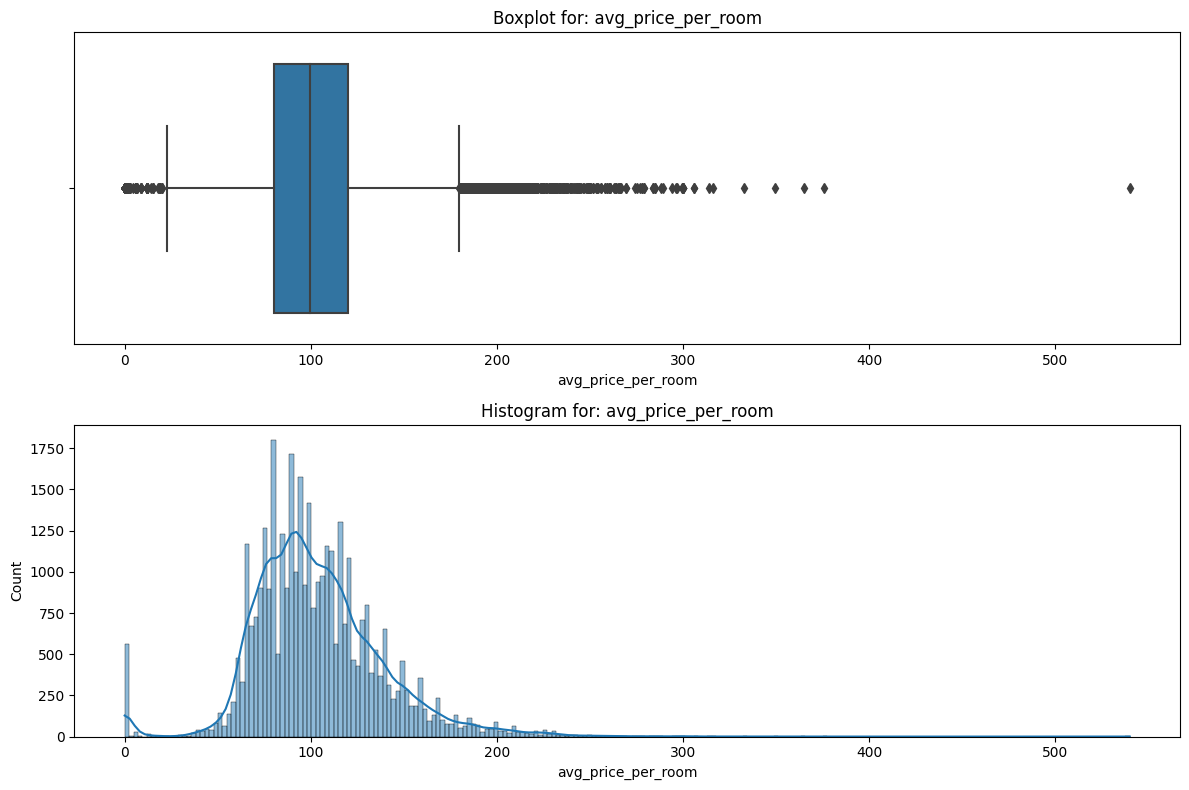

In [ ]:
histogram_boxplot(df, 'avg_price_per_room')

### Univariate - Categorical Features

Now let's look at the remaining features to have a better understanding of how these categories are distributed

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=45, fontsize=15)
    plt.title(f"Barplot of {feature}")
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        #order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

In [ ]:
def proportion_values(data,feature):
  return(data.groupby(feature)[feature].count()/len(data))

#### Booking_ID

Given that Booking_IDs are unique identifiers, for forecasting and anlaytical purposes, they're not relevant. To that end, we won't plot their distribution.

#### No. of Adults

Number of adults per booking

In [ ]:
df.groupby('no_of_adults')['no_of_adults'].count()/len(df)

no_of_adults
0    0.003832
1    0.212130
2    0.719724
3    0.063873
4    0.000441
Name: no_of_adults, dtype: float64

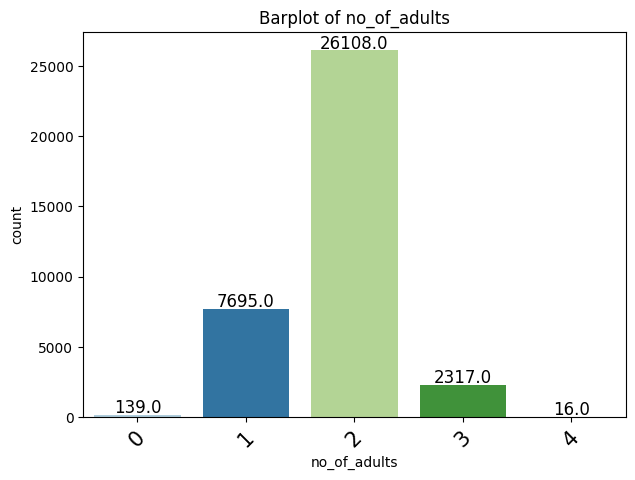

In [ ]:
labeled_barplot(df, 'no_of_adults')

#### No. of Children

In [ ]:
proportion_values(df, 'no_of_children')

no_of_children
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

Number of Children per booking

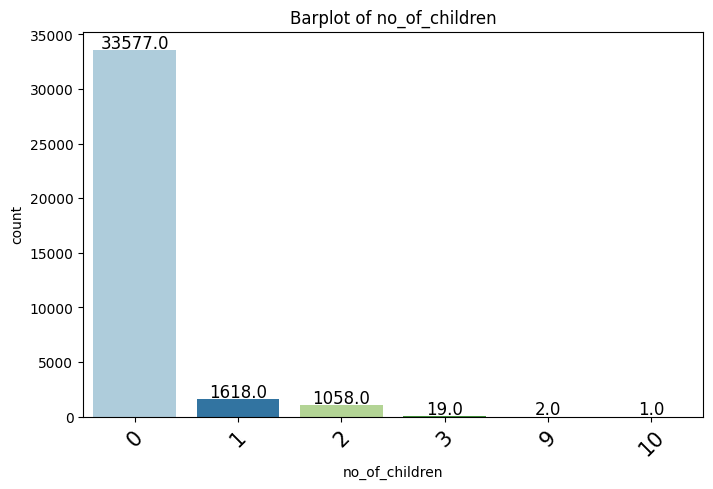

In [ ]:
labeled_barplot(df, 'no_of_children')

#### No. of Weekend Nights

In [ ]:
proportion_values(df, 'no_of_weekend_nights')

no_of_weekend_nights
0    0.465114
1    0.275534
2    0.250062
3    0.004218
4    0.003556
5    0.000937
6    0.000551
7    0.000028
Name: no_of_weekend_nights, dtype: float64

Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

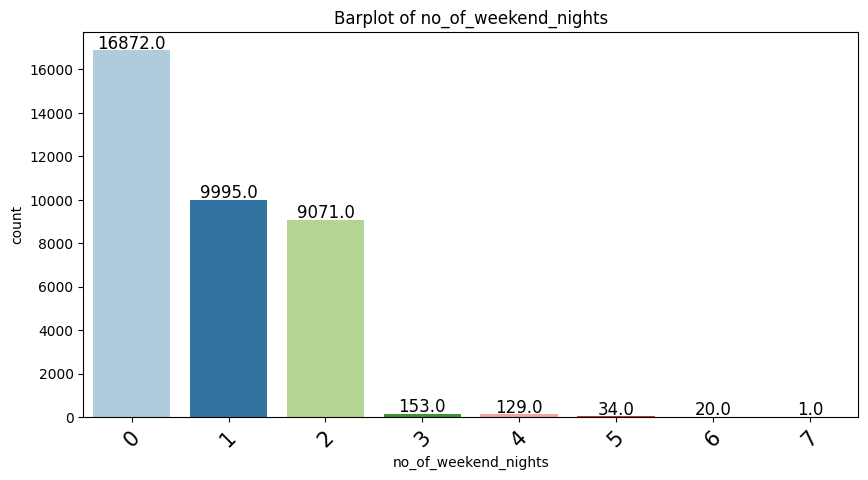

In [ ]:
labeled_barplot(df, 'no_of_weekend_nights')

#### No. of Week Nights

Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

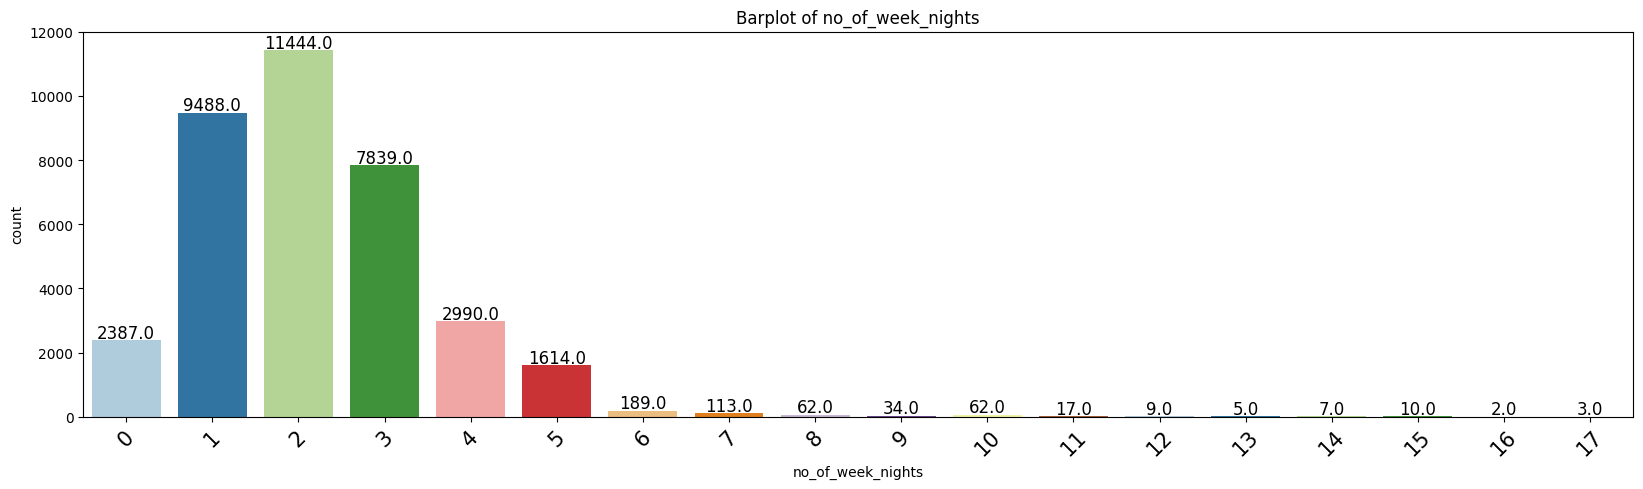

In [ ]:
labeled_barplot(df, 'no_of_week_nights')

#### Type of Meal Plan

Type of meal plan booked by the customer:


*   Not Selected: No meal plan selected
*   Meal Plan 1: Breakfast
*   Meal Plan 2: Half board (breakfast and one other meal)
*   Meal Plan 3: Full board (breakfast, lunch, and dinner)

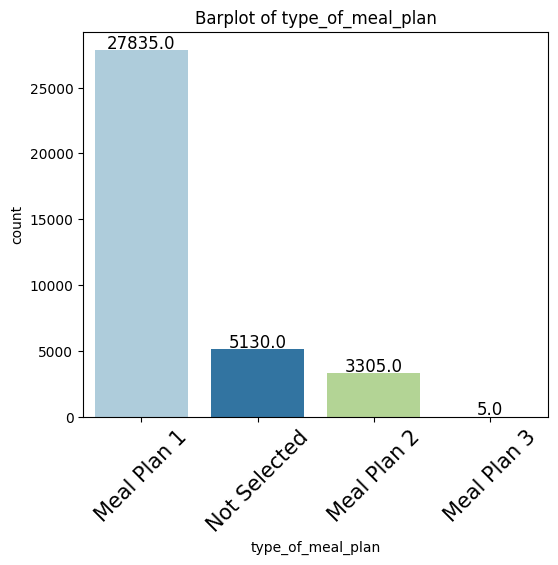

In [ ]:
labeled_barplot(df, 'type_of_meal_plan')

#### Required Parking Space

Does the customer require a car parking space? (0 - No, 1- Yes)

In [ ]:
proportion_values(df, 'required_car_parking_space')

required_car_parking_space
0    0.969014
1    0.030986
Name: required_car_parking_space, dtype: float64

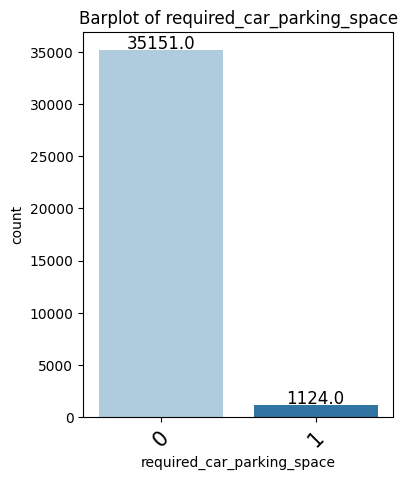

In [ ]:
labeled_barplot(df, 'required_car_parking_space')

#### Room Type Reserved

Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

In [ ]:
proportion_values(df, 'room_type_reserved')

room_type_reserved
Room_Type 1    0.775465
Room_Type 2    0.019076
Room_Type 3    0.000193
Room_Type 4    0.166975
Room_Type 5    0.007305
Room_Type 6    0.026630
Room_Type 7    0.004356
Name: room_type_reserved, dtype: float64

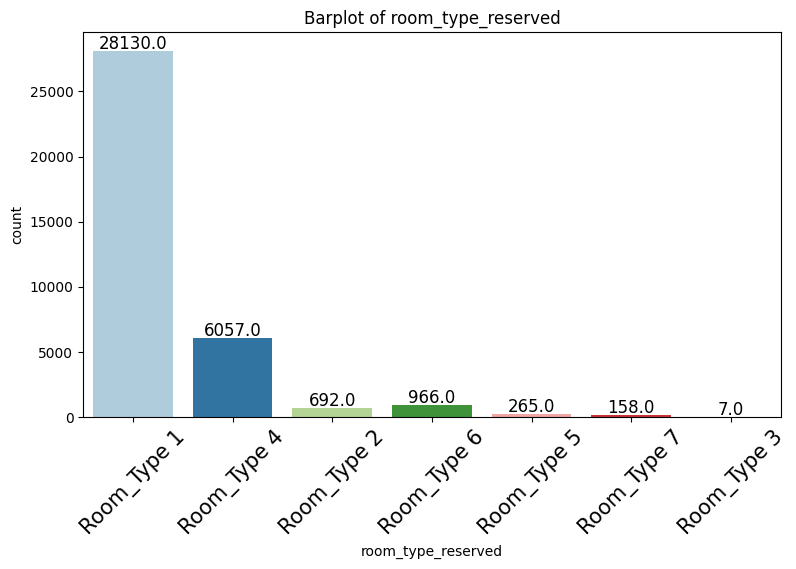

In [ ]:
labeled_barplot(df, 'room_type_reserved')

#### Arrival Year

Year of arrival date

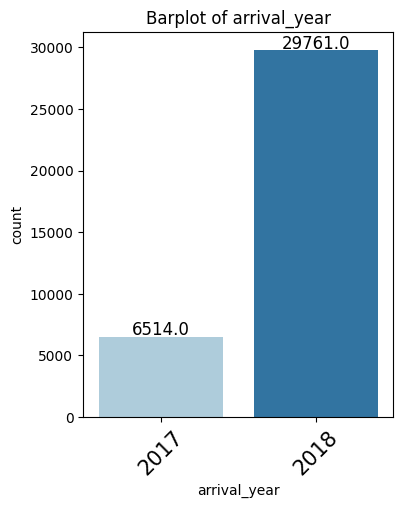

In [ ]:
labeled_barplot(df, 'arrival_year')

#### Arrival Month

Month of arrival for the booking

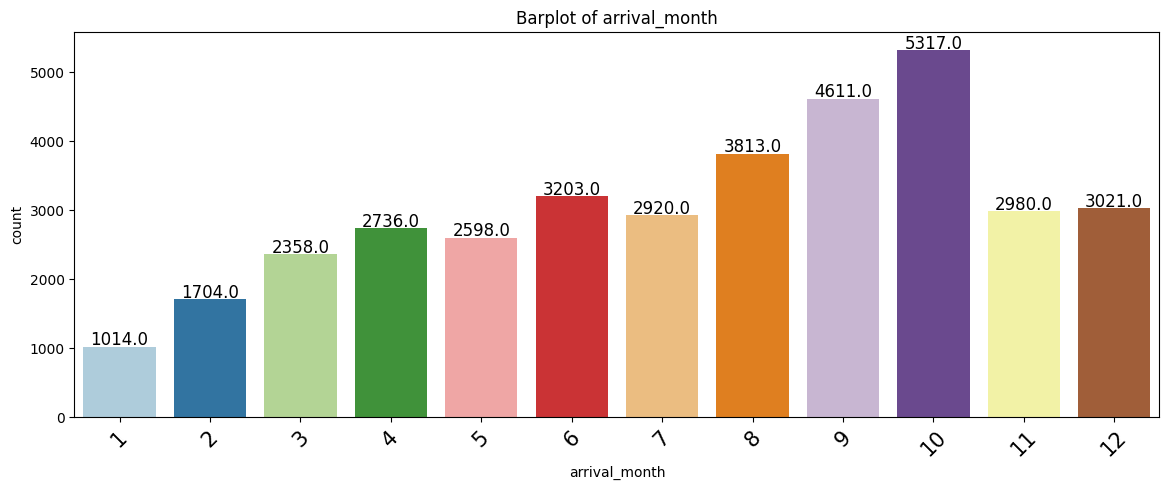

In [ ]:
labeled_barplot(df, 'arrival_month')

#### Arrival Date of Month

Day of the month the customer arrived for the booking

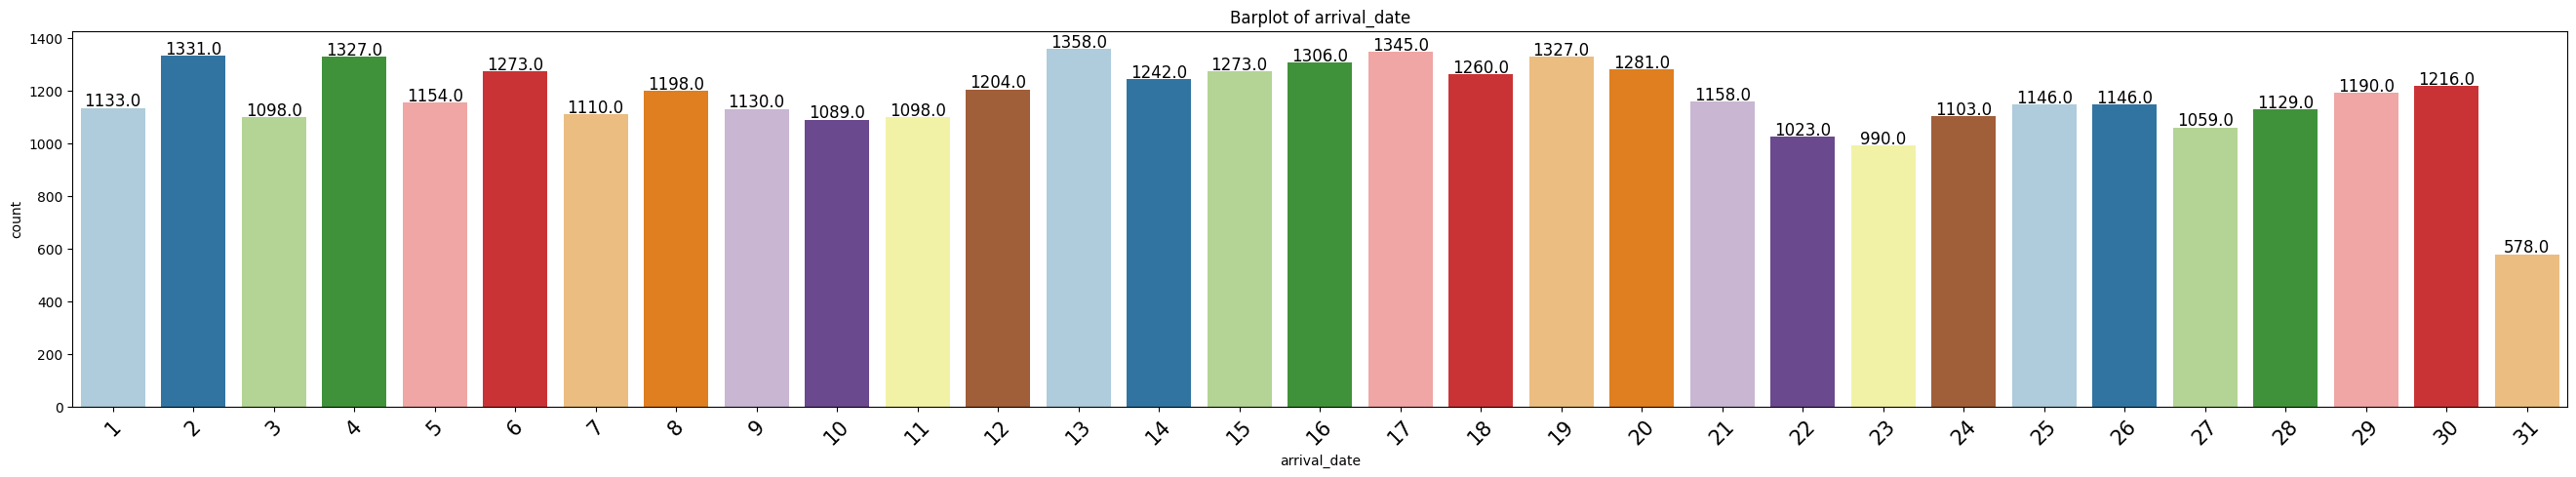

In [ ]:
labeled_barplot(df, 'arrival_date')

#### Market Segment

Market segment designation

In [ ]:
proportion_values(df,'market_segment_type')

market_segment_type
Aviation         0.003446
Complementary    0.010779
Corporate        0.055603
Offline          0.290227
Online           0.639945
Name: market_segment_type, dtype: float64

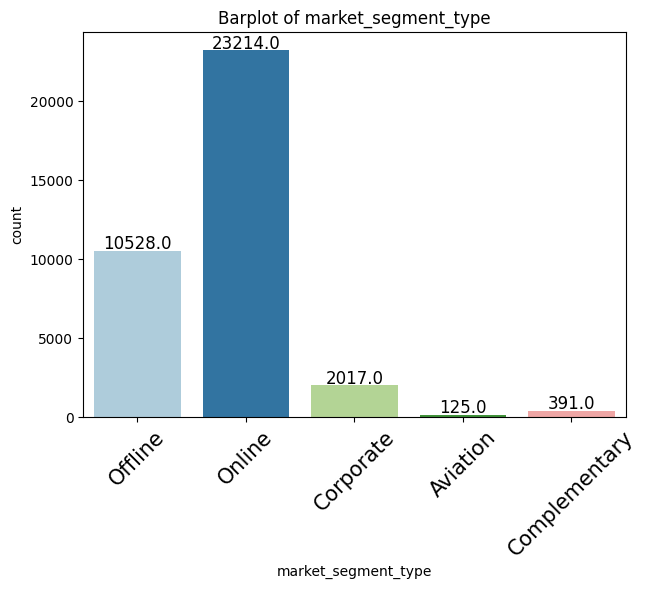

In [ ]:
labeled_barplot(df, 'market_segment_type')

#### Repeated Guest

Is the customer a repeated guest? (0-No, 1-Yes)

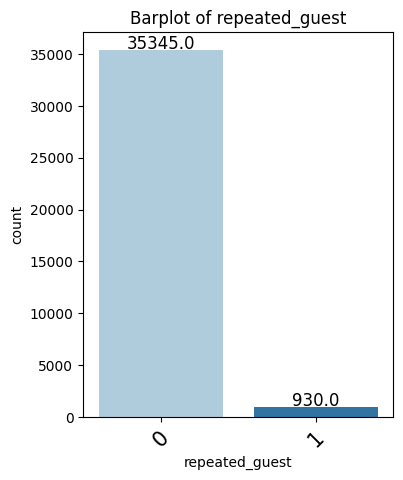

In [ ]:
labeled_barplot(df, 'repeated_guest')

#### No. of previous cancellations

Number of previous bookings that were canceled by the customer prior to the current booking

In [ ]:
proportion_values(df,'no_of_previous_cancellations')

no_of_previous_cancellations
0     0.990682
1     0.005458
2     0.001268
3     0.001185
4     0.000276
5     0.000303
6     0.000028
11    0.000689
13    0.000110
Name: no_of_previous_cancellations, dtype: float64

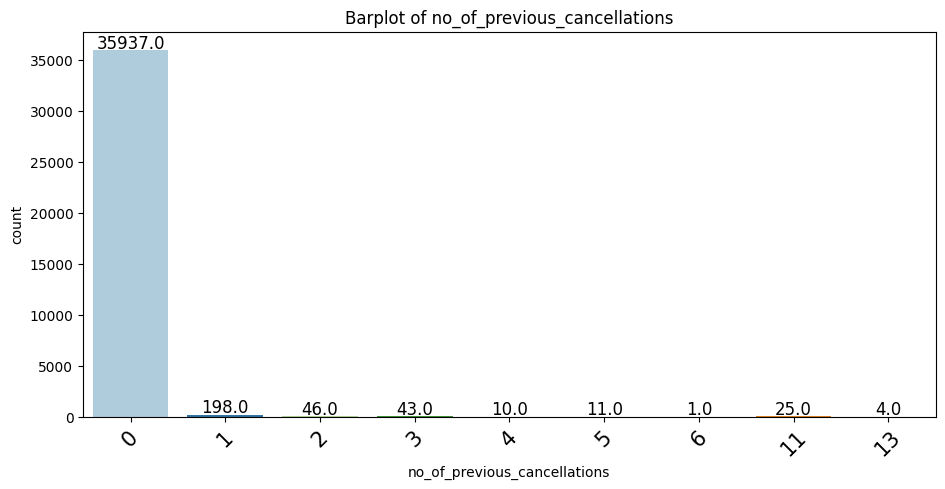

In [ ]:
labeled_barplot(df, 'no_of_previous_cancellations')

#### No. of Previous bookings not cancelled

Number of previous bookings not canceled by the customer prior to the current booking

In [ ]:
proportion_values(df,'no_of_previous_bookings_not_canceled')

no_of_previous_bookings_not_canceled
0     0.977615
1     0.006285
2     0.003088
3     0.002205
4     0.001792
5     0.001654
6     0.000992
7     0.000662
8     0.000634
9     0.000524
10    0.000524
11    0.000414
12    0.000331
13    0.000193
14    0.000248
15    0.000221
16    0.000193
17    0.000165
18    0.000165
19    0.000165
20    0.000165
21    0.000165
22    0.000165
23    0.000083
24    0.000083
25    0.000083
26    0.000055
27    0.000083
28    0.000055
29    0.000055
30    0.000055
31    0.000055
32    0.000055
33    0.000028
34    0.000028
35    0.000028
36    0.000028
37    0.000028
38    0.000028
39    0.000028
40    0.000028
41    0.000028
42    0.000028
43    0.000028
44    0.000055
45    0.000028
46    0.000028
47    0.000028
48    0.000055
49    0.000028
50    0.000028
51    0.000028
52    0.000028
53    0.000028
54    0.000028
55    0.000028
56    0.000028
57    0.000028
58    0.000028
Name: no_of_previous_bookings_not_canceled, dtype: float64

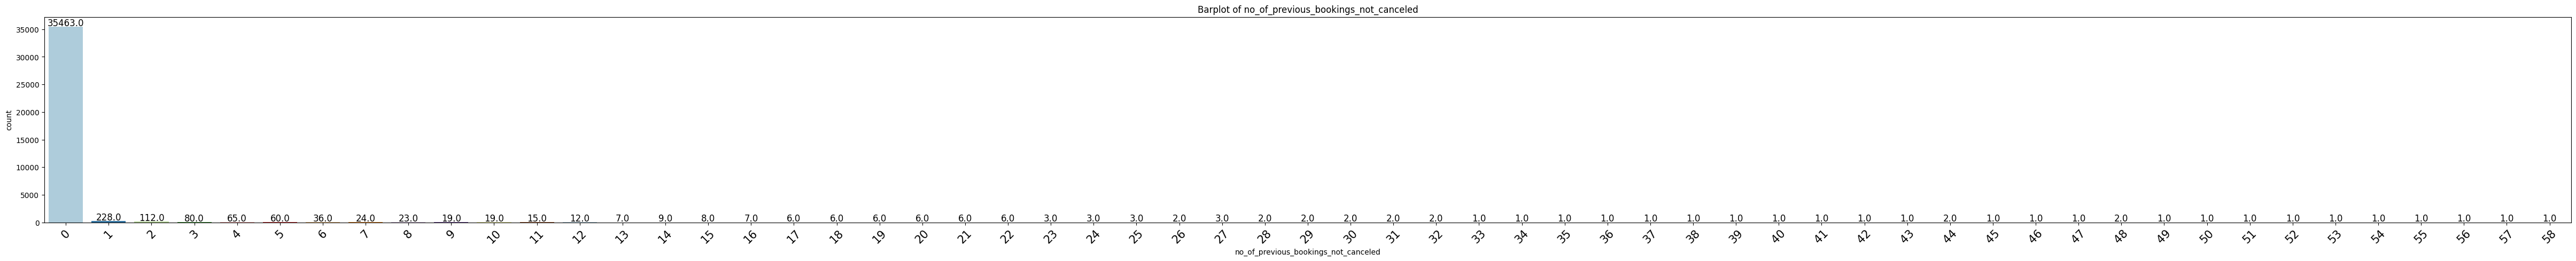

In [ ]:
labeled_barplot(df, 'no_of_previous_bookings_not_canceled')

#### No. of Special Requests

Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

In [ ]:
proportion_values(df,'no_of_special_requests')

no_of_special_requests
0    0.545196
1    0.313522
2    0.120303
3    0.018608
4    0.002150
5    0.000221
Name: no_of_special_requests, dtype: float64

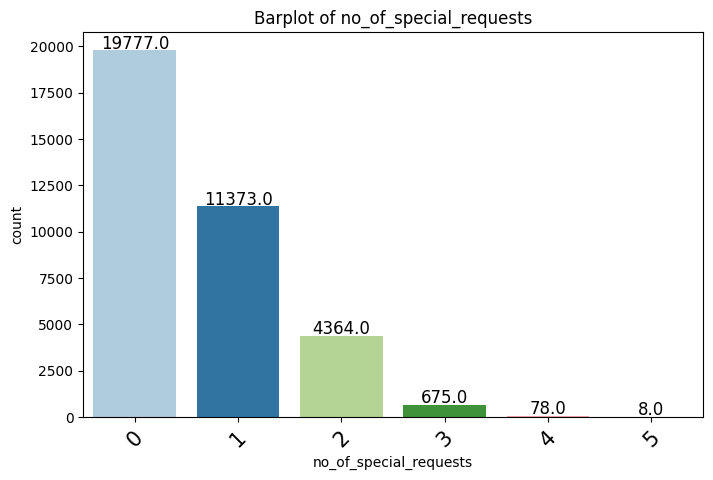

In [ ]:
labeled_barplot(df, 'no_of_special_requests')

#### Booking Status

Flag indicating if the booking was canceled or not.

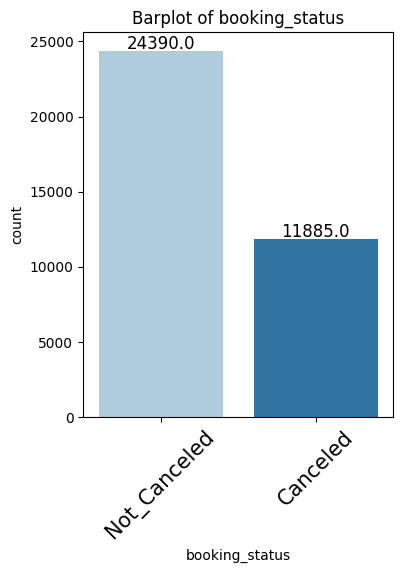

In [ ]:
labeled_barplot(df, 'booking_status')

### Bivaraite Analysis

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)

    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))

    # Add data labels to each bar segment
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.legend(
        loc="lower left", frameon=False,
    )

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Correlation amongst all numerical features

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols


['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [ ]:
# for the purpose of this analysis, let's also look at non-numerical features
obj_cols = df.select_dtypes(include='O').columns.tolist()
obj_cols

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

#### Correlation check

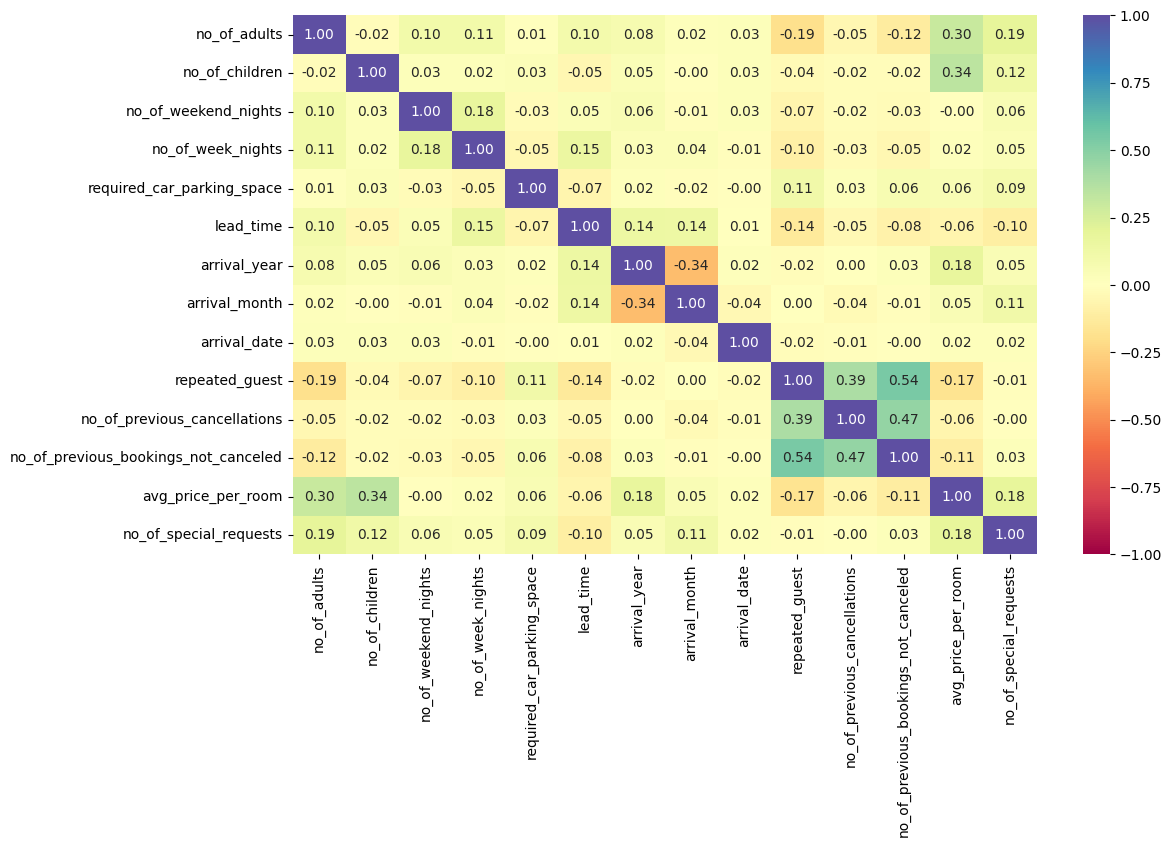

In [ ]:
# drop numerical features that are categorical in nature

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:


*   Overall, we can see that numerical features are not significantly correlated to one another
*   However, `repeated_guest` has a mild correlation to `no_of_previous_booking_not_cancelled`
*   And, `no_of_previous_booking_not_cancelled` has a mild correlation to `no_of_previous_cancellations`

These features, however, are correlated because there is a large class imbalance within them. Meaning, the vast majority of the output is 0. Thus these features will be removed from the feature list, as they act more like a constant rather than a feature.







#### Busiest months

Bookings by month to observe whether different months have differnet amounts of bookings:

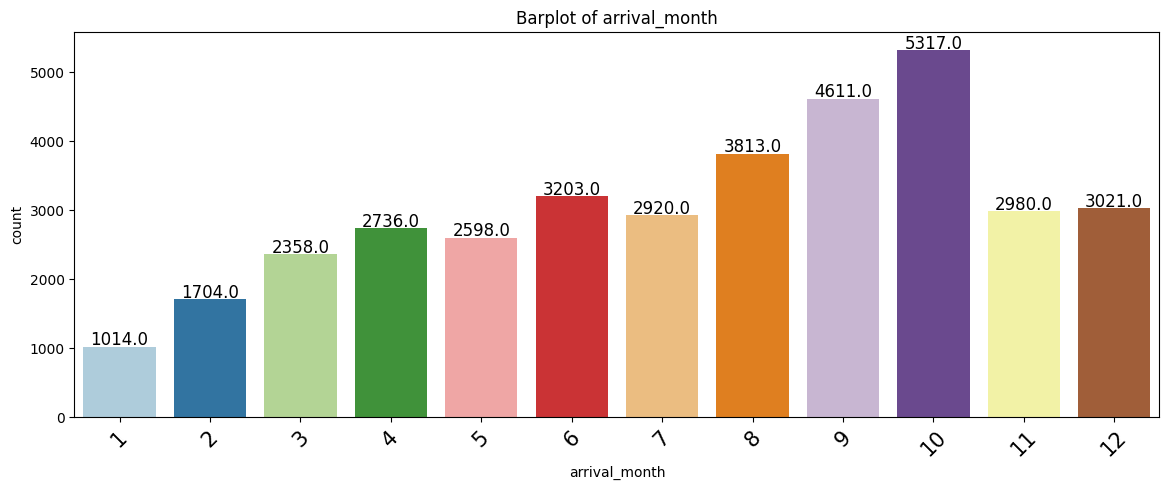

In [ ]:
labeled_barplot(df, 'arrival_month')

September and October appear to be the busiest months, while impressively enough November and December start to drop. Would need to understand the type of hotel this is and understand how they see this.

#### Bookings by Market Segment

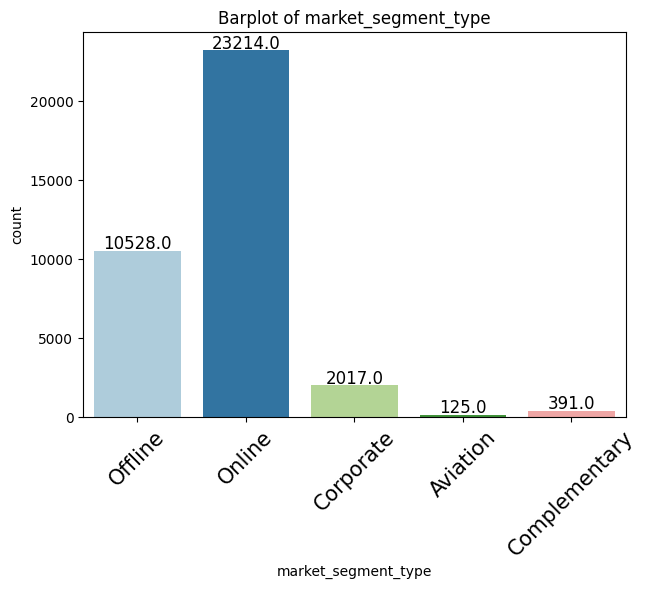

In [ ]:
labeled_barplot(df, 'market_segment_type')

#### Average Room Price by Market Segment

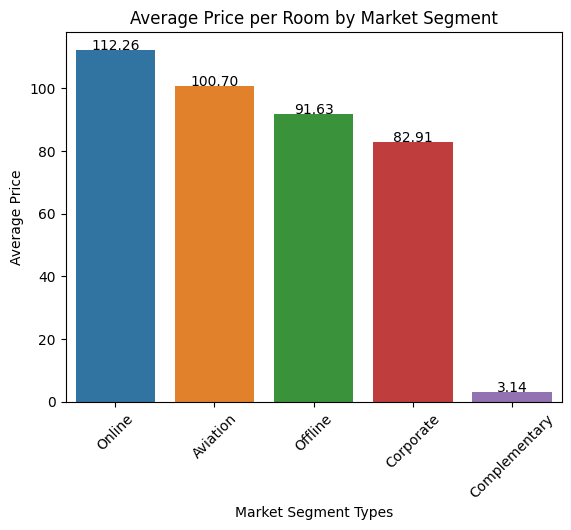

In [ ]:
avg_price_by_segment = df.groupby('market_segment_type')['avg_price_per_room'].mean().to_frame().reset_index().sort_values(by='avg_price_per_room', ascending=False)

plt.title('Average Price per Room by Market Segment')
plot_val = sns.barplot(data = avg_price_by_segment, x = 'market_segment_type', y='avg_price_per_room')
plt.xlabel('Market Segment Types')
plt.ylabel('Average Price')

for p in plot_val.patches:
    height = p.get_height()
    plot_val.text(p.get_x() + p.get_width() / 2., height + 0.05, f"{height:.2f}", ha='center')


plt.xticks(rotation=45)
plt.show();

#### Percentage of Bookings Cancelled

Let's look at the total percentage of cancelled bookings

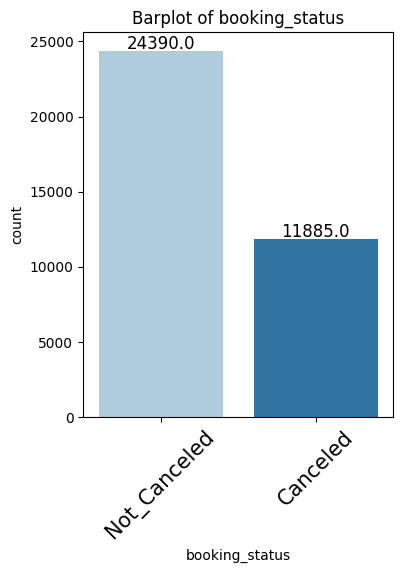

In [ ]:
labeled_barplot(df, 'booking_status')

In [ ]:
df.groupby('booking_status')['booking_status'].count()/len(df)

booking_status
Canceled        0.327636
Not_Canceled    0.672364
Name: booking_status, dtype: float64

About ~32% of bookings are cancelled. We can also look at potential relationships between cancellations and other features.

#### Cancellation of repeat guests

In [ ]:
#first, let's look at the overall cancellation proportion
bookings_distribution = df['booking_status'].value_counts()
bookings_distribution

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [ ]:
#first, let's look at the overall cancellation proportion
bookings_distribution_norm = df['booking_status'].value_counts(normalize = True)
bookings_distribution_norm

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

<Axes: xlabel='index', ylabel='booking_status'>

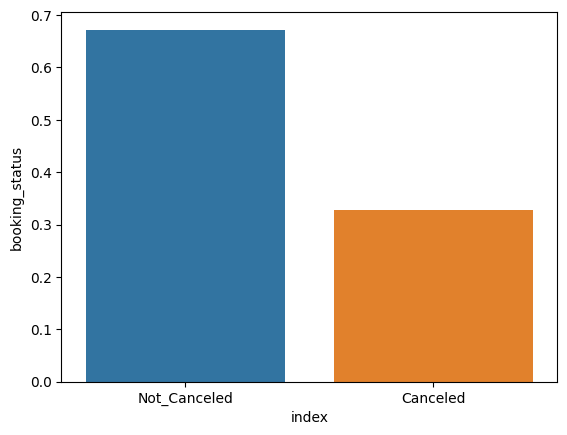

In [ ]:
bookings_distribution_norm = bookings_distribution_norm.reset_index()
sns.barplot(data = bookings_distribution_norm, x = 'index', y =  'booking_status')

As repeat guests are important for the hotel and their brand, let's look at how often they cancel vs non-repeat customers

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


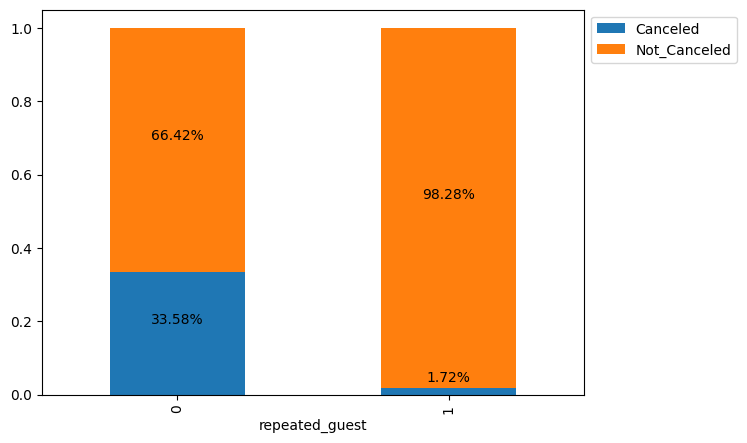

In [ ]:
stacked_barplot(df, "repeated_guest", "booking_status")

It's interesting to see that guests that have attended the hotel, tend to not cancel by 98%. In comparison for new customers that cancel about 34% of the time. The average cancellation rate is ~32%, driven by new guests

#### Bookings by Requirements Count

Let us first look at the distribution of total special requests made by guests

In [ ]:

df['no_of_special_requests'].value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

We can see that the vast majority made at least 1 request. Thus I'll bin all additional customer requests as 2 or more (2+)

In [ ]:
# I will first group these bookings by whether they had requirements or not.
df_mapped = df.copy()
df_mapped['no_of_special_requests'] = df_mapped['no_of_special_requests'].apply(lambda x: '2+' if x > 1 else x)

In [ ]:
df_mapped['no_of_special_requests'].value_counts()

0     19777
1     11373
2+     5125
Name: no_of_special_requests, dtype: int64

With this new binning in place, we can look at the relationship between guests that had a special requested and whether these cancelled.

In [ ]:
requests_bookings = df_mapped.groupby('no_of_special_requests')['booking_status'].value_counts()
requests_bookings

no_of_special_requests  booking_status
0                       Not_Canceled      11232
                        Canceled           8545
1                       Not_Canceled       8670
                        Canceled           2703
2+                      Not_Canceled       4488
                        Canceled            637
Name: booking_status, dtype: int64

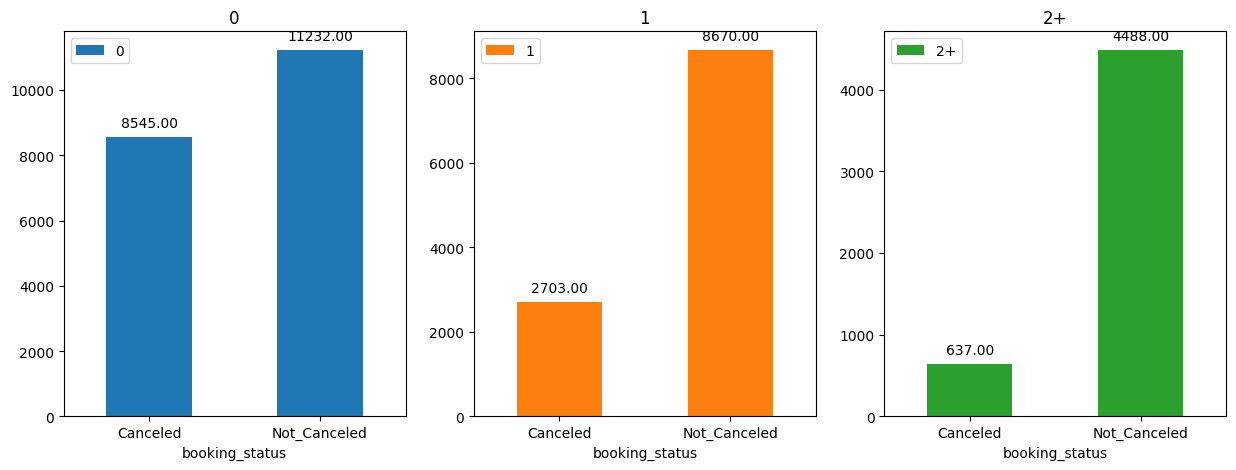

In [ ]:
ax2 = requests_bookings.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(15, 5), layout=(1, 3))

# Annotate each bar with its data label
for ax_i in ax2.flatten():
    for p in ax_i.patches:
        ax_i.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
#now we can look at the proportion:
requests_bookings_n = df_mapped.groupby('no_of_special_requests')['booking_status'].value_counts(normalize = True)
requests_bookings_n

no_of_special_requests  booking_status
0                       Not_Canceled      0.567932
                        Canceled          0.432068
1                       Not_Canceled      0.762332
                        Canceled          0.237668
2+                      Not_Canceled      0.875707
                        Canceled          0.124293
Name: booking_status, dtype: float64

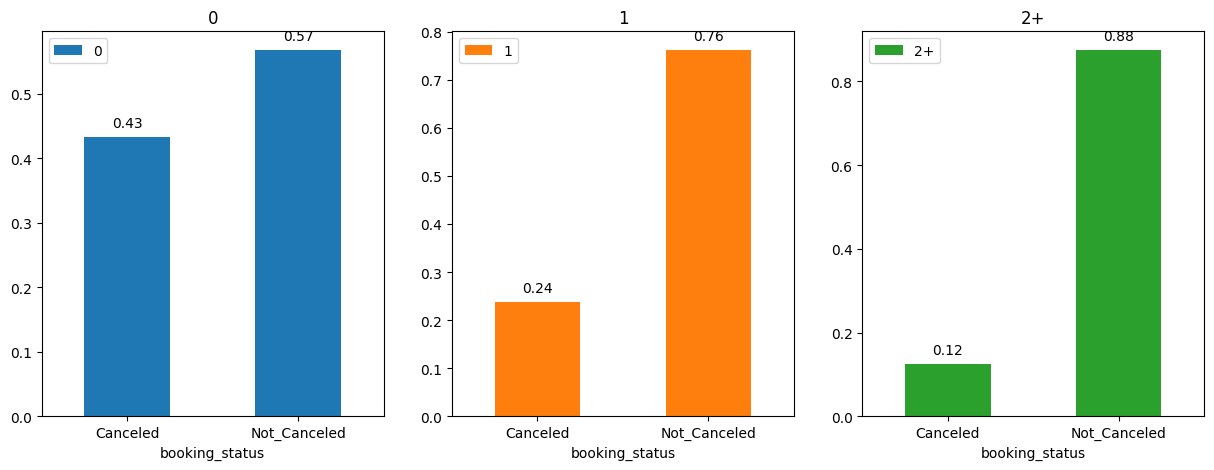

In [ ]:
ax3 = requests_bookings_n.unstack(level=0).plot(kind='bar', stacked = True, subplots=True, rot=0, figsize=(15, 5), layout=(1, 3))

# Annotate each bar with its data label
for ax_i in ax3.flatten():
    for p in ax_i.patches:
        ax_i.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
ax4 = requests_bookings_n.unstack(level=1)

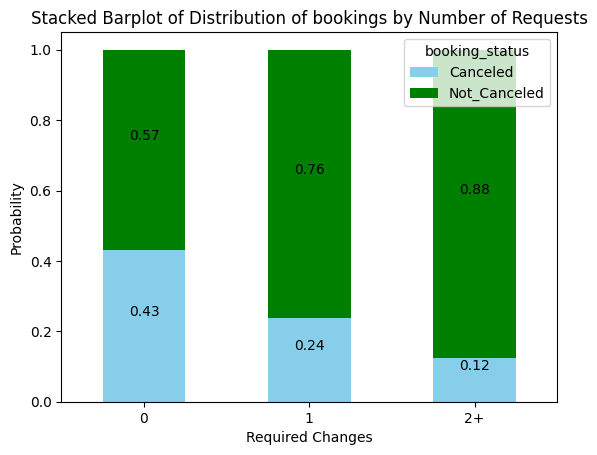

In [ ]:
# create stacked bar chart for monthly temperatures
ax = ax4.plot(kind='bar', stacked=True, color=['skyblue', 'green'], rot=0)

# Annotate each bar with its data label
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Set labels and title
plt.xlabel('Required Changes')
plt.ylabel('Probability')
plt.title('Stacked Barplot of Distribution of bookings by Number of Requests')

# Show the plot
plt.show()

It appears that as guests have more changes, they appear to have lower cancellation rates.

#### Average Price per Room by Month of Year

In [ ]:
room_cost_by_month = pd.DataFrame(df.groupby('arrival_month')['avg_price_per_room'].mean()).reset_index()
room_cost_by_month

arrival_month  avg_price_per_room
0               1           74.749763
1               2           80.733644
2               3           91.883698
3               4          101.998801
4               5          113.810677
5               6          111.966500
6               7          111.649318
7               8          113.203984
8               9          115.906916
9              10          104.460873
10             11           91.285426
11             12           88.952185

In [ ]:
bookings_by_month = pd.DataFrame(df.groupby('arrival_month')['avg_price_per_room'].count()).reset_index()

bookings_by_month.rename(columns={'avg_price_per_room': 'booking_by_month'}, inplace=True)
bookings_by_month

arrival_month  booking_by_month
0               1              1014
1               2              1704
2               3              2358
3               4              2736
4               5              2598
5               6              3203
6               7              2920
7               8              3813
8               9              4611
9              10              5317
10             11              2980
11             12              3021

In [ ]:
#let's combine these into a single dataframe
bookings_price_month = pd.merge(room_cost_by_month, bookings_by_month, on='arrival_month')
bookings_price_month

arrival_month  avg_price_per_room  booking_by_month
0               1           74.749763              1014
1               2           80.733644              1704
2               3           91.883698              2358
3               4          101.998801              2736
4               5          113.810677              2598
5               6          111.966500              3203
6               7          111.649318              2920
7               8          113.203984              3813
8               9          115.906916              4611
9              10          104.460873              5317
10             11           91.285426              2980
11             12           88.952185              3021

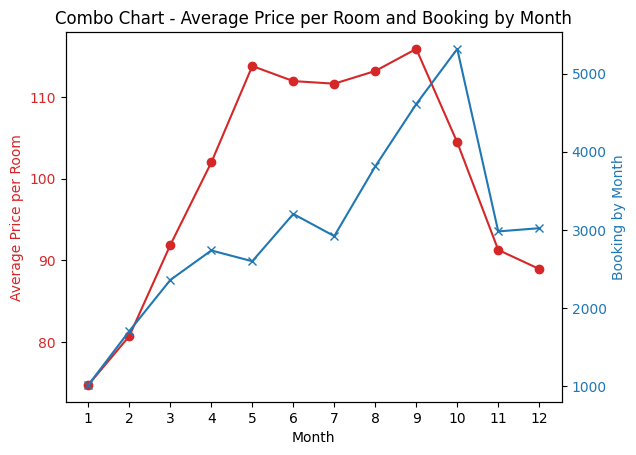

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first line chart (average price)
color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Price per Room', color=color)
ax1.plot(bookings_price_month['arrival_month'], bookings_price_month['avg_price_per_room'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Set x-axis ticks and labels for each month
ax1.set_xticks(bookings_price_month['arrival_month'])
ax1.set_xticklabels(bookings_price_month['arrival_month'])

# Create a second y-axis for the second line chart (booking by month)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Booking by Month', color=color)
ax2.plot(bookings_price_month['arrival_month'], bookings_price_month['booking_by_month'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Display the combo chart
plt.title('Combo Chart - Average Price per Room and Booking by Month')
plt.show()

Now let's separate it by month and year

In [ ]:
room_cost_by_month2 = pd.DataFrame(df.groupby(['arrival_year','arrival_month'])['avg_price_per_room'].mean()).reset_index()
room_cost_by_month2['month_year'] = room_cost_by_month2['arrival_month'].astype(str) + "-" + room_cost_by_month2['arrival_year'].astype(str)
room_cost_by_month2 = room_cost_by_month2.drop(['arrival_year','arrival_month'],axis=1)
room_cost_by_month2

avg_price_per_room month_year
0            84.890468     7-2017
1            91.091400     8-2017
2           103.335185     9-2017
3            92.032002    10-2017
4            72.339104    11-2017
5            75.430463    12-2017
6            74.749763     1-2018
7            80.733644     2-2018
8            91.883698     3-2018
9           101.998801     4-2018
10          113.810677     5-2018
11          111.966500     6-2018
12          115.448092     7-2018
13          121.214759     8-2018
14          122.905831     9-2018
15          111.445723    10-2018
16           96.539721    11-2018
17           94.947482    12-2018

In [ ]:
bookings_by_month2 = pd.DataFrame(df.groupby(['arrival_year','arrival_month'])['avg_price_per_room'].count()).reset_index()
bookings_by_month2['month_year'] = bookings_by_month2['arrival_month'].astype(str) + "-" + bookings_by_month2['arrival_year'].astype(str)
bookings_by_month2.rename(columns={'avg_price_per_room': 'booking_by_month'}, inplace=True)
bookings_by_month2 = bookings_by_month2.drop(['arrival_year','arrival_month'],axis=1)

bookings_by_month2

booking_by_month month_year
0                363     7-2017
1               1014     8-2017
2               1649     9-2017
3               1913    10-2017
4                647    11-2017
5                928    12-2017
6               1014     1-2018
7               1704     2-2018
8               2358     3-2018
9               2736     4-2018
10              2598     5-2018
11              3203     6-2018
12              2557     7-2018
13              2799     8-2018
14              2962     9-2018
15              3404    10-2018
16              2333    11-2018
17              2093    12-2018

In [ ]:
#let's combine these into a single dataframe
bookings_price_month2 = pd.merge(room_cost_by_month2, bookings_by_month2, on='month_year')
#bookings_price_month2['month_year'] = pd.to_datetime(bookings_price_month2['month_year'], format='%m-%Y')

# Sort the DataFrame by the 'Date' column
#bookings_price_month2 = bookings_price_month2.sort_values(by='month_year')
bookings_price_month2

avg_price_per_room month_year  booking_by_month
0            84.890468     7-2017               363
1            91.091400     8-2017              1014
2           103.335185     9-2017              1649
3            92.032002    10-2017              1913
4            72.339104    11-2017               647
5            75.430463    12-2017               928
6            74.749763     1-2018              1014
7            80.733644     2-2018              1704
8            91.883698     3-2018              2358
9           101.998801     4-2018              2736
10          113.810677     5-2018              2598
11          111.966500     6-2018              3203
12          115.448092     7-2018              2557
13          121.214759     8-2018              2799
14          122.905831     9-2018              2962
15          111.445723    10-2018              3404
16           96.539721    11-2018              2333
17           94.947482    12-2018              2093

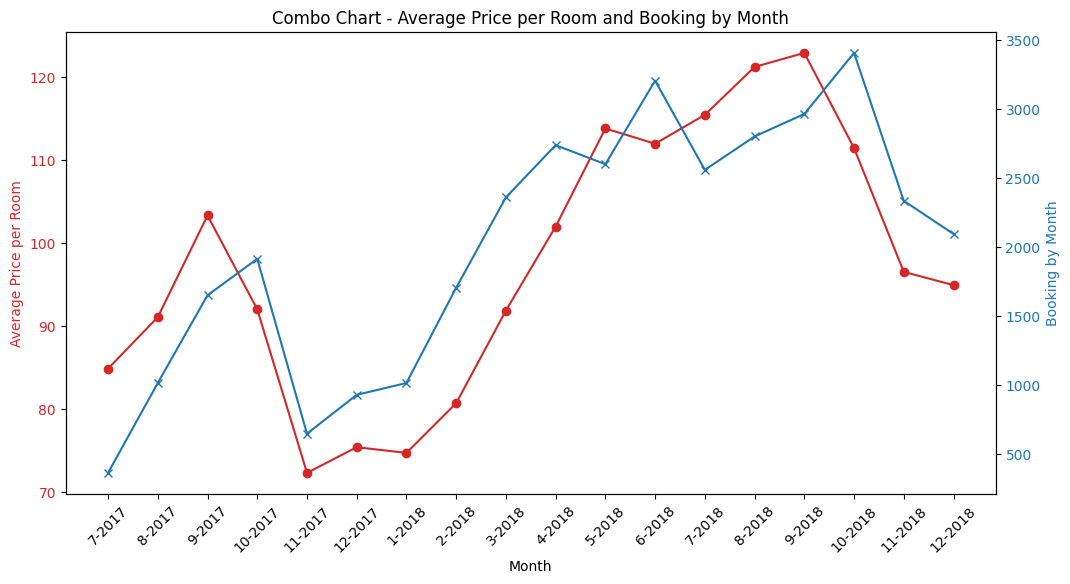

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first line chart (average price)
color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Price per Room', color=color)
ax1.plot(bookings_price_month2['month_year'], bookings_price_month2['avg_price_per_room'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Set x-axis ticks and labels for each month with rotation
ax1.set_xticks(bookings_price_month2['month_year'])
ax1.set_xticklabels(bookings_price_month2['month_year'], rotation=45)

# Create a second y-axis for the second line chart (booking by month)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Booking by Month', color=color)
ax2.plot(bookings_price_month2['month_year'], bookings_price_month2['booking_by_month'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Display the combo chart
plt.title('Combo Chart - Average Price per Room and Booking by Month')
plt.show()

#### Lead time vs Booking Status

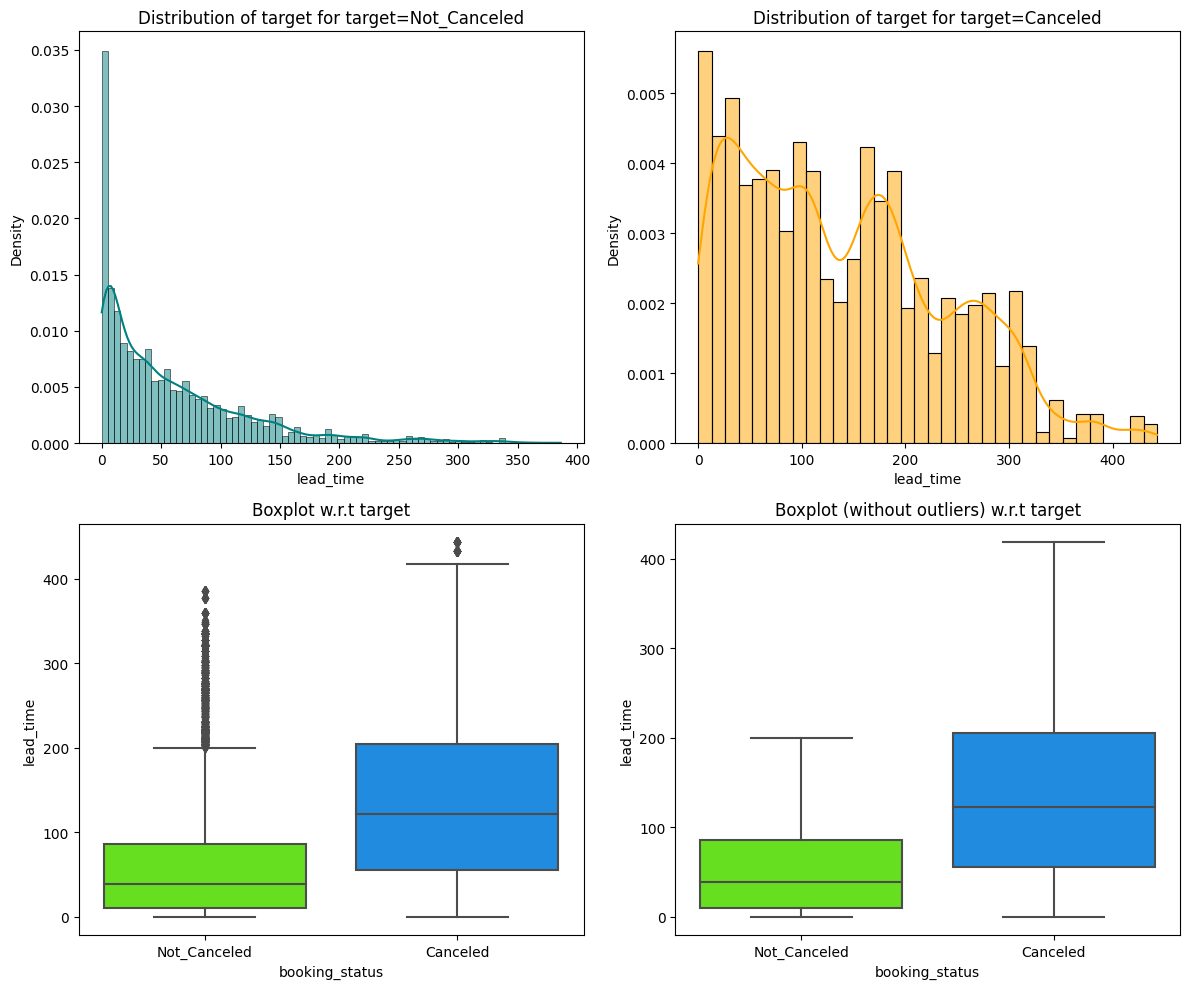

In [ ]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

#### Avg Price per Room vs Booking Status

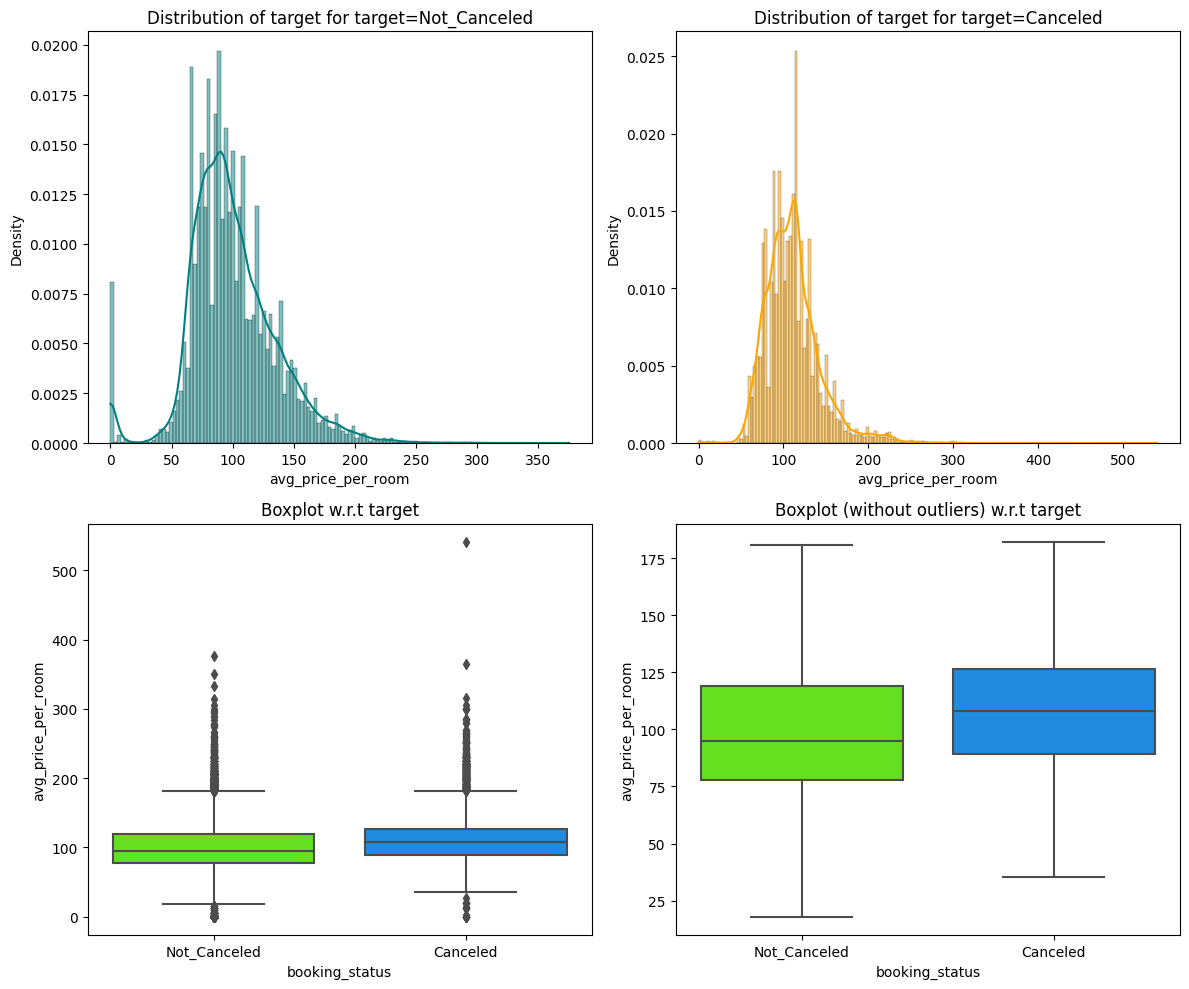

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

#### Market Segment vs Repeated guest

In [ ]:
df.groupby('market_segment_type')['repeated_guest'].value_counts(normalize=True)

market_segment_type  repeated_guest
Aviation             0                 0.872000
                     1                 0.128000
Complementary        0                 0.677749
                     1                 0.322251
Corporate            0                 0.701537
                     1                 0.298463
Offline              0                 0.991451
                     1                 0.008549
Online               0                 0.995865
                     1                 0.004135
Name: repeated_guest, dtype: float64

<Axes: xlabel='market_segment_type', ylabel='Count'>

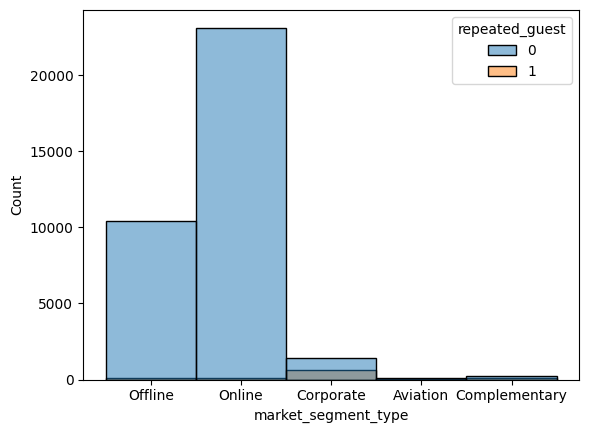

In [ ]:
sns.histplot(data=df,x= 'market_segment_type', hue = 'repeated_guest')

#### Lead Time vs Avg Price of booking by Booking Status

<Axes: xlabel='lead_time', ylabel='avg_price_per_room'>

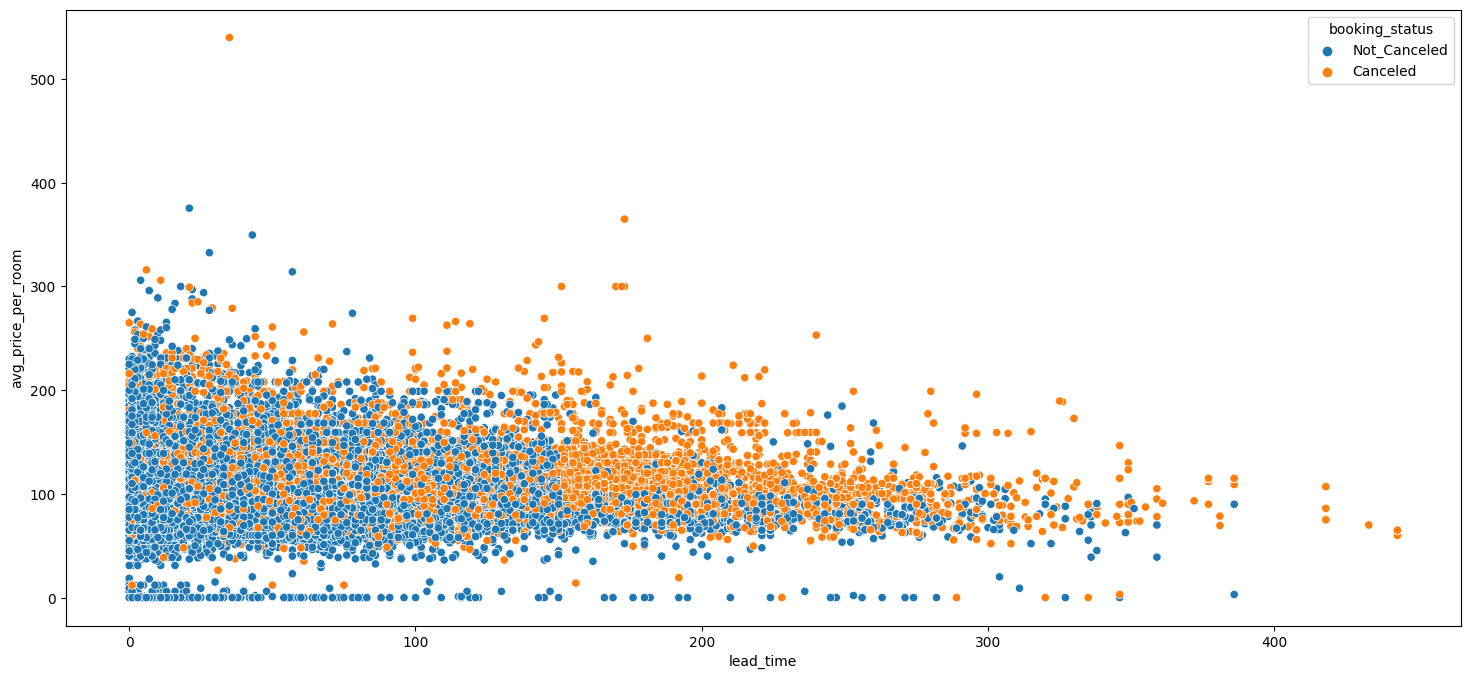

In [ ]:
plt.figure(figsize=(18, 8))
sns.scatterplot(data=df,x= 'lead_time', y = "avg_price_per_room", hue = "booking_status")

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
df2 = df.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Missing Values

There are no missing values in the dataset to treat.

#### Feature Engineering

There are some features that need further modification to prevent overfitting and have a more robust model. Some features don't provide as much predictable data, so they will be dropped accordingly. First, let's look at handling outliers:

##### Dropping features

I will drop the following features:


*   `Booking_ID`: offers no predictive value, it's an identifier
*   `Arrival_date_month`: the day of the month is not a predictive indicator, unless it's a specific date like a day holiday




In [ ]:
cols_to_drop = ["Booking_ID","arrival_date"]
df2 = df2.drop(columns = cols_to_drop)
df2

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month market_segment_type  \
0            224          2017             10             Offline   
1              5          2018             11              Online   
2              1          2018              2              Online   
3            211          2018              5              Online   
4             48          2018              4              Online   
...          ...           ...            ...                 ...   
36270         85          2018              8              Online   
36271        228          2018             10              Online   
36272        148          2018              7              Online   
36273         63          2018              4              Online   
36274        207          2018             12             Offline   

       repeated_guest  no_of_previous_cancellations  \
0                   0                             0   
1                   0                             0   
2                   0                             0   
3                   0                             0   
4                   0                             0   
...               ...                           ...   
36270               0                             0   
36271               0                             0   
36272               0                             0   
36273               0                             0   
36274               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
36270                                     0              167.80   
36271                                     0               90.95   
36272                                     0               98.39 

##### Handling Outliers

Let's once again look at the distribution of numerical features to better understand which have outliers that can skew our data:

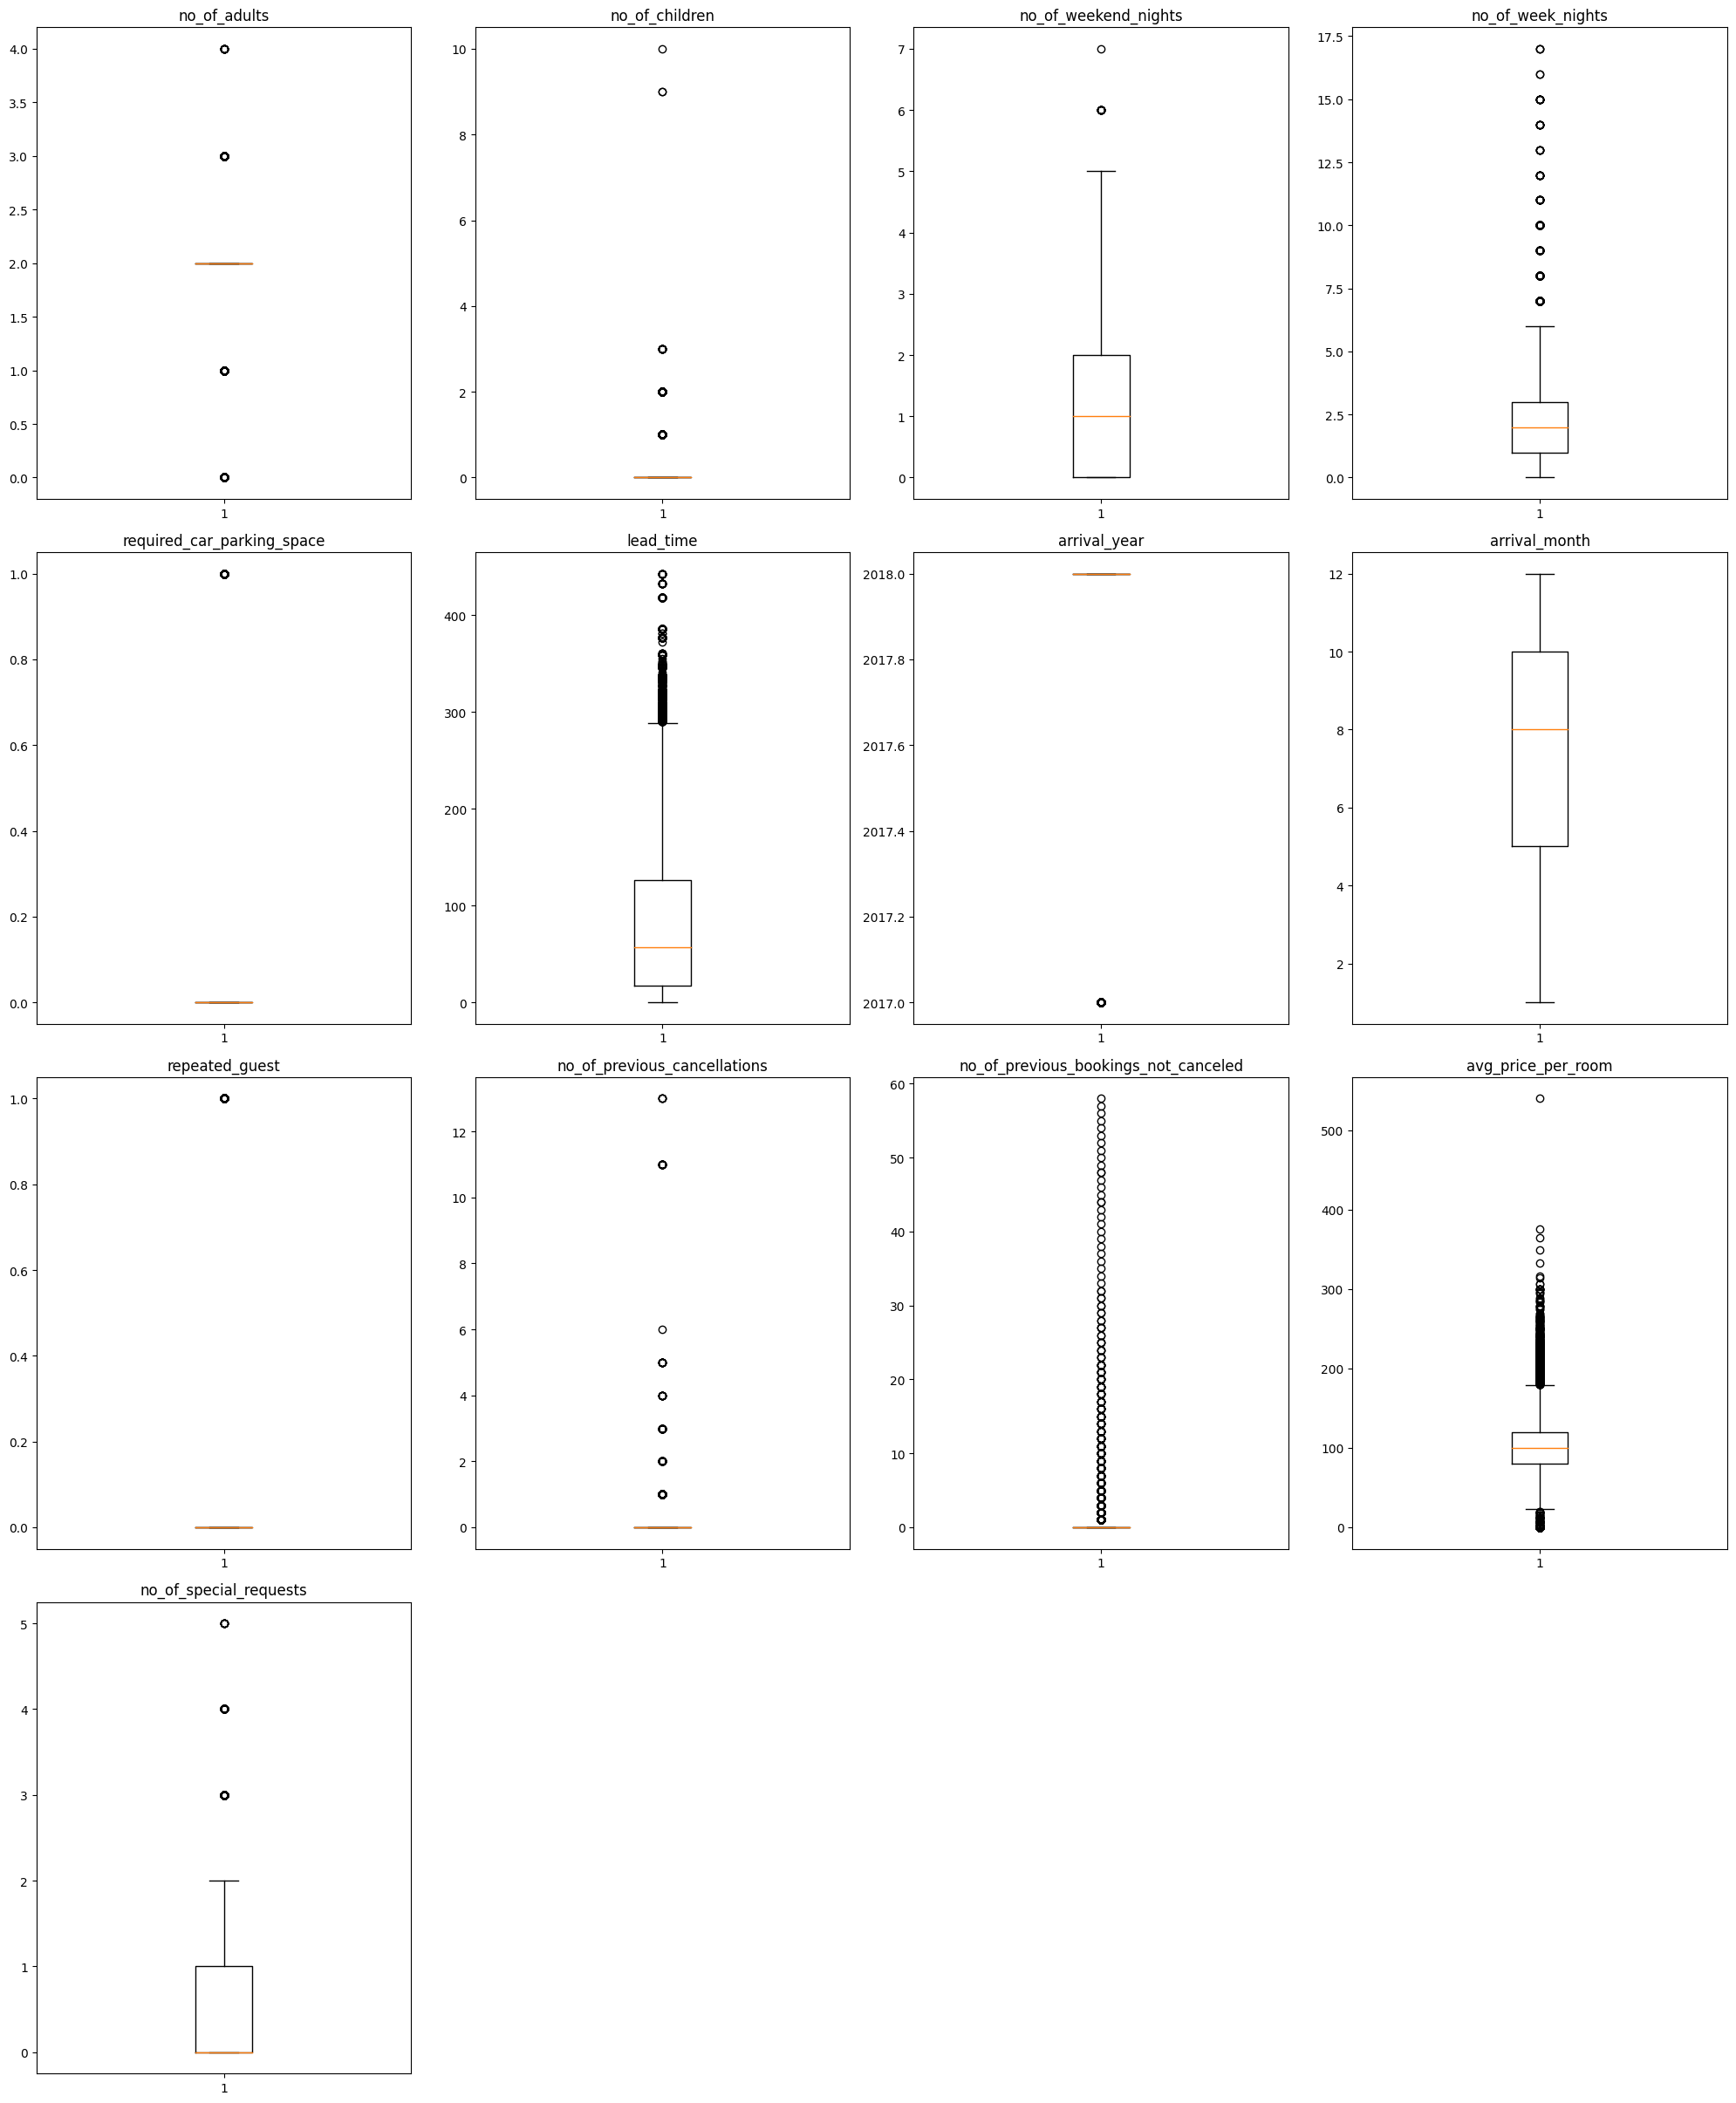

In [ ]:
numerical_col = df2.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

We will particularly treat outliers for our numerical features, which are `lead_time` and `avg_price_per_room`.

*   For the `lead_time`, there might be some guests that book a lot in advanced. According to the current distribution, customers with a longer lead time tend to cancel more. However, that doesn't appear to be signficant and can be just because they have more time to do so. There are also a lot of outliers for those that didn't cancel in the 4th IQ range.
*   For `avg_price_per_room`, we see that the distribution of average price between booking status is relatively similar to those customers that cancelled and didn't cancel. There is also a spike in customers that paid little to not much for their rooms, but that most likely is driven by customers that received a complimentary room.



In [ ]:
# functions to treat outliers by flooring and capping

def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
# we will only replace outliers for the numerical features
numerical_features = ['lead_time','avg_price_per_room']

In [ ]:
df2 = treat_outliers_all(df2, numerical_features)

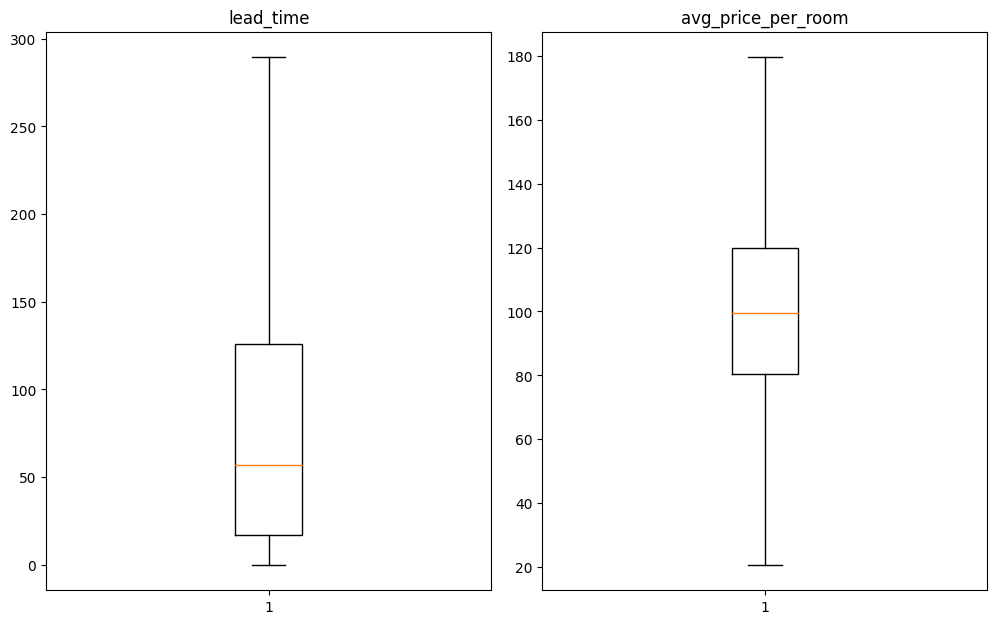

In [ ]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_features):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

##### Binning

A lot of the data requires to bin features into groups to reduce dimensionality. Here is how I'll bin these feauters:

*   `no_of_adults`: <=1,2,3+
*   `no_of_children`: 0,1+
*   `no_of_weekend_nights`: 0,1,2+
*   `no_of_week_nights`: 0,1,2,3,4,5+
*   `type_of_meal_plan`: Meal Plan 3 = Other
*   `room_type_reserved`: Type 1, Type 4, Others
*   `no_of_previous_cancellations`: 0,1+
*   `no_of_previous_bookings_not_canceled`: 0,1+
*   `no_of_special_requests`: 0,1,2+

And for the target variable:
*   `booking_status`: Not Cancelled: 0, Cancelled: 1



###### No. of adults

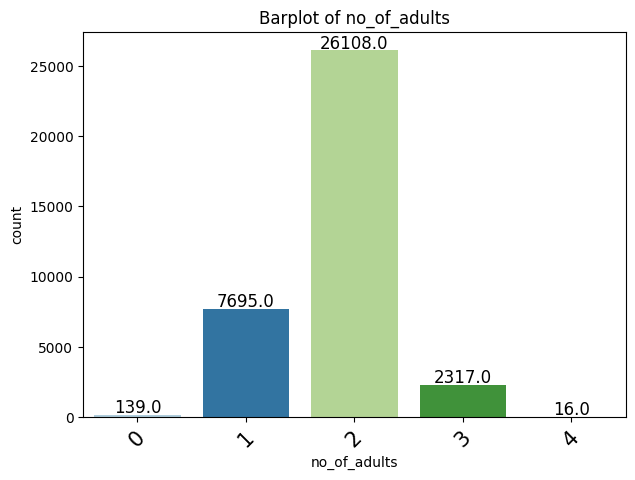

In [ ]:
labeled_barplot(df2, 'no_of_adults')

In [ ]:
df2["no_of_adults"] = df2["no_of_adults"].apply(lambda x: "<=1" if x <= 1 else "3+" if x >= 3 else str(x))

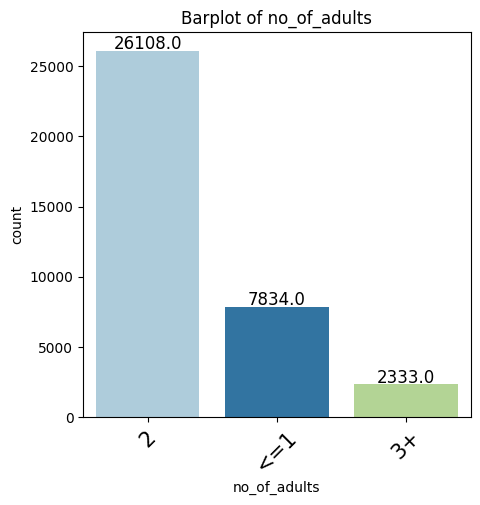

In [ ]:
labeled_barplot(df2, 'no_of_adults')

###### No. of Children

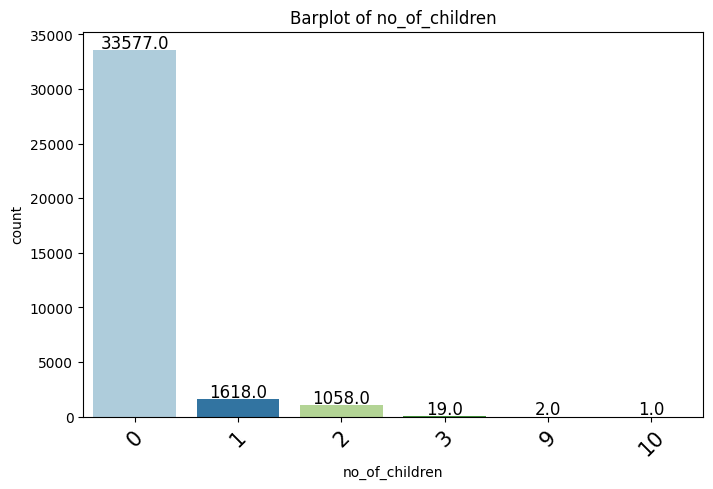

In [ ]:
labeled_barplot(df2, 'no_of_children')

In [ ]:
df2["no_of_children"] = df2["no_of_children"].apply(lambda x: "1+" if x >= 1 else str(x))

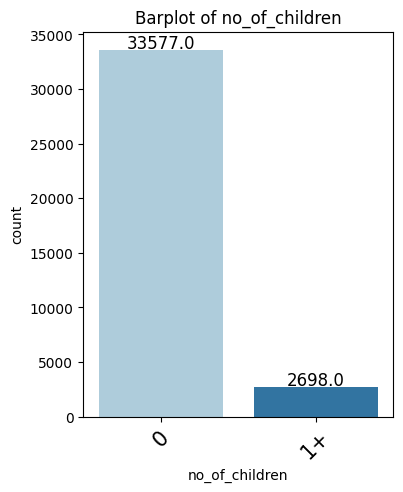

In [ ]:
labeled_barplot(df2, 'no_of_children')

###### Weekend Nights

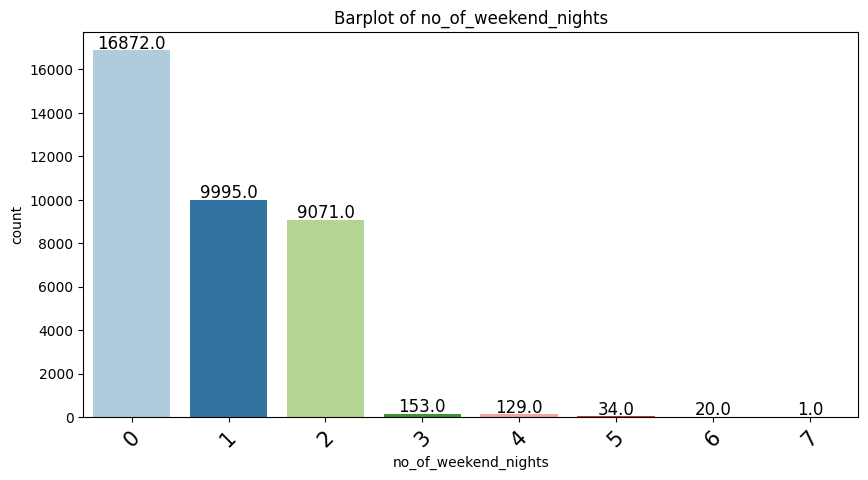

In [ ]:
labeled_barplot(df2, 'no_of_weekend_nights')

In [ ]:
df2["no_of_weekend_nights"] = df2["no_of_weekend_nights"].apply(lambda x: "2+" if x >= 2 else str(x))

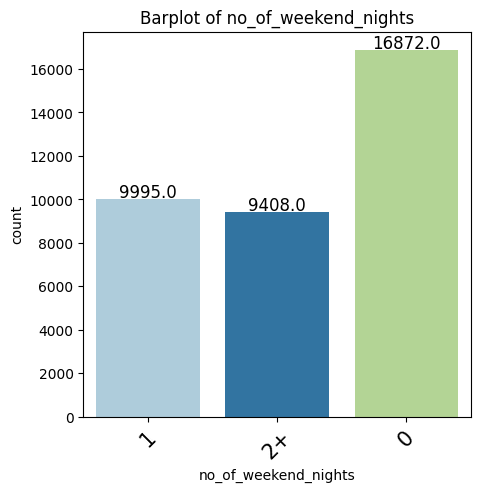

In [ ]:
labeled_barplot(df2, 'no_of_weekend_nights')

###### Week Nights

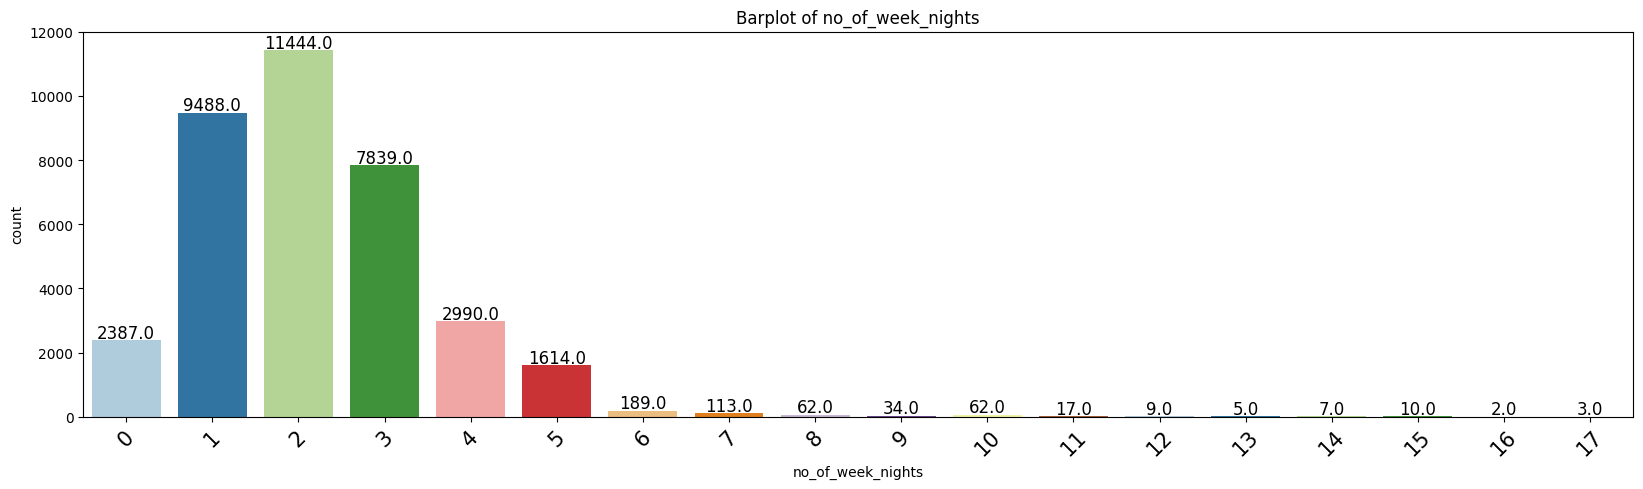

In [ ]:
labeled_barplot(df2, 'no_of_week_nights')

In [ ]:
df2["no_of_week_nights"] = df2["no_of_week_nights"].apply(lambda x: "5+" if x >= 5 else str(x))

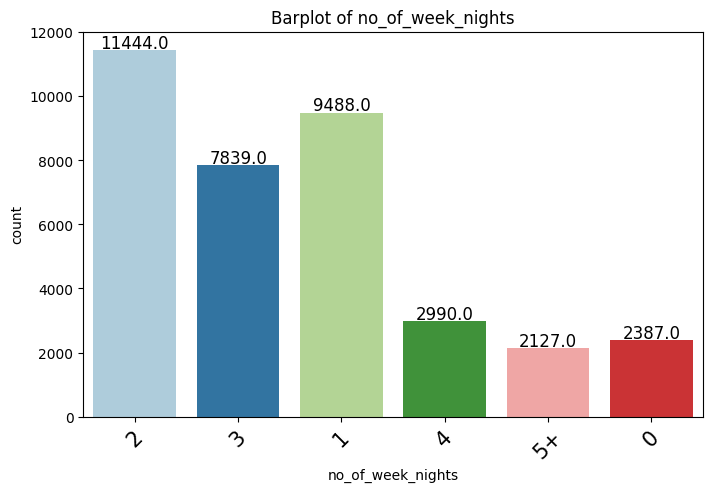

In [ ]:
labeled_barplot(df2, 'no_of_week_nights')

###### Type of Meal

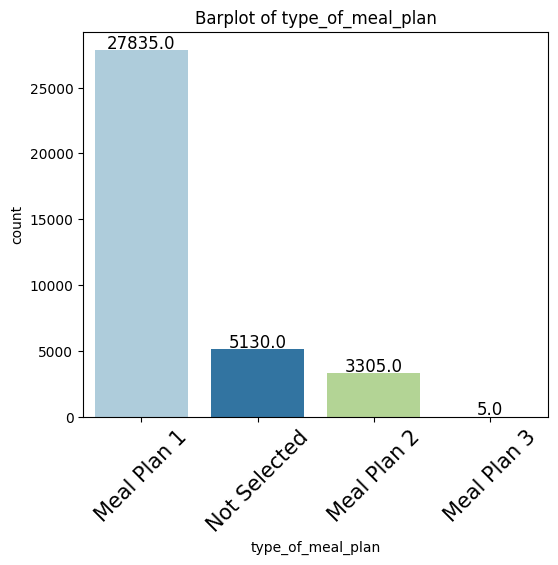

In [ ]:
labeled_barplot(df2, 'type_of_meal_plan')

In [ ]:
df2["type_of_meal_plan"] = df2["type_of_meal_plan"].replace("Meal Plan 3","Not Selected")

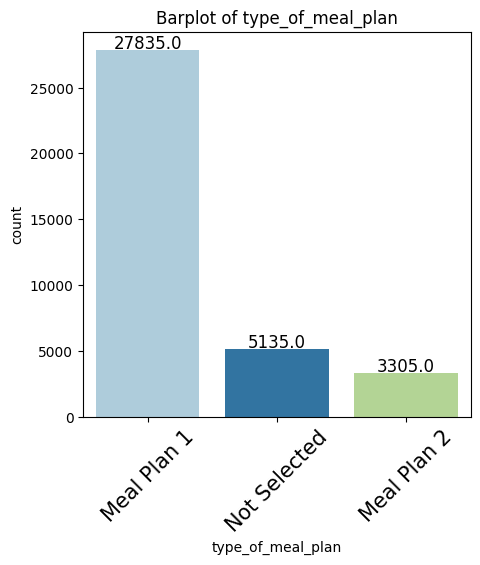

In [ ]:
labeled_barplot(df2, 'type_of_meal_plan')

###### Room Type Reserved

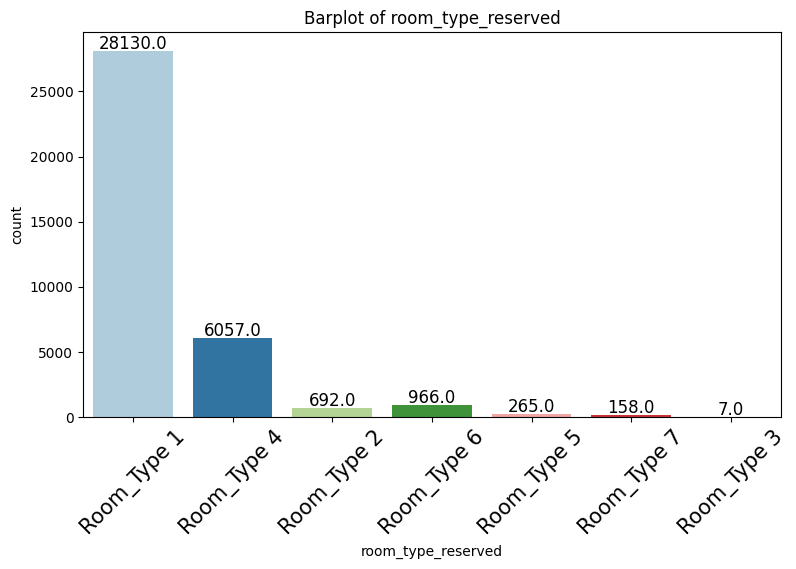

In [ ]:
labeled_barplot(df2, 'room_type_reserved')

In [ ]:
replace_structure = {"Room_Type 2": "Other","Room_Type 6": "Other","Room_Type 5": "Other","Room_Type 7": "Other","Room_Type 3": "Other"}
df2['room_type_reserved'] = df2['room_type_reserved'].replace(replace_structure)


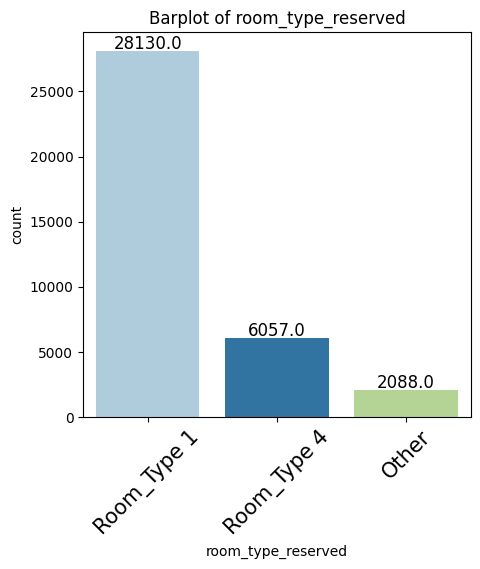

In [ ]:
labeled_barplot(df2, 'room_type_reserved')

###### No. of Previous Cancellations

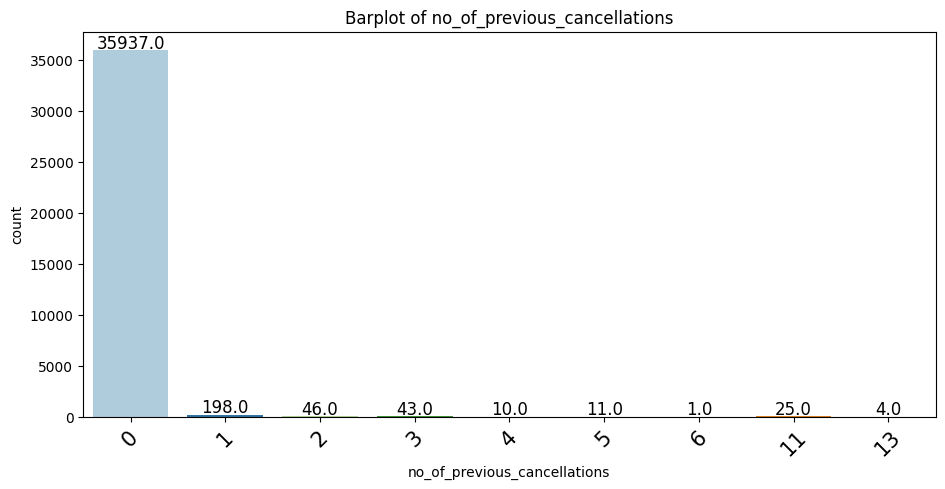

In [ ]:
labeled_barplot(df2, 'no_of_previous_cancellations')

In [ ]:
df2["no_of_previous_cancellations"] = df2["no_of_previous_cancellations"].apply(lambda x: "1+" if x >= 1 else str(x))

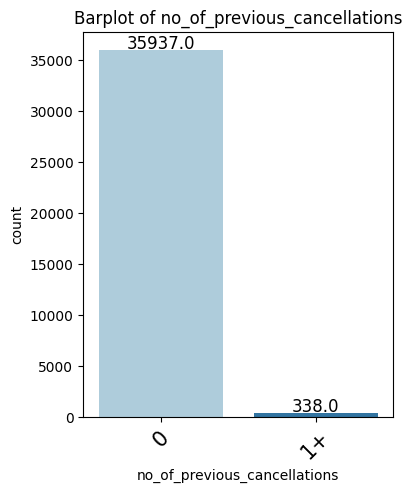

In [ ]:
labeled_barplot(df2, 'no_of_previous_cancellations')

###### No. of Previous Bookings Not Cancelled

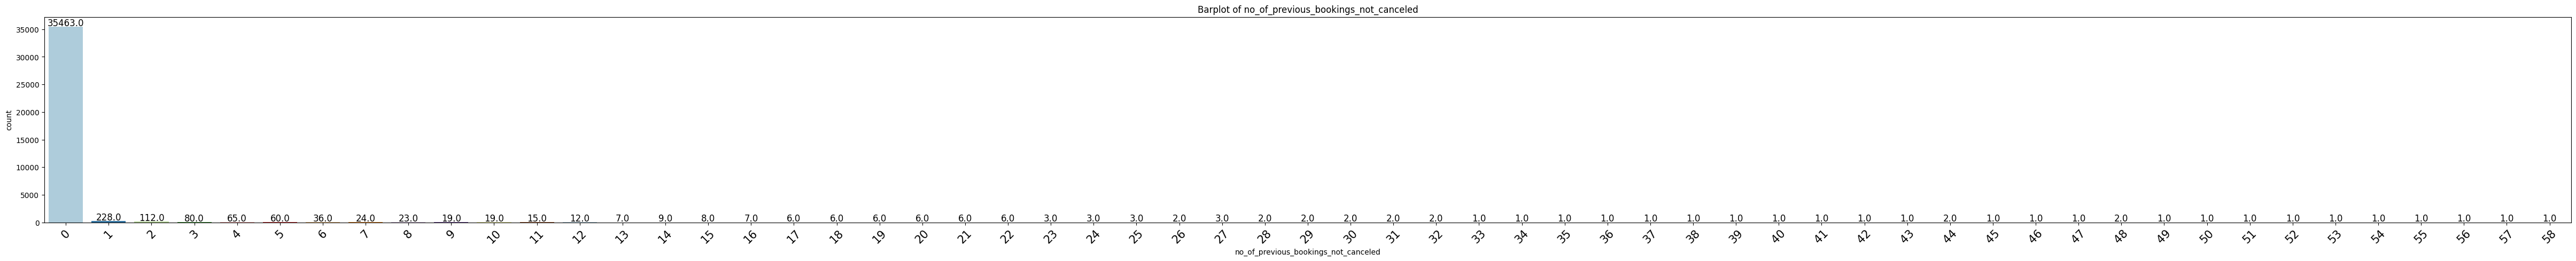

In [ ]:
labeled_barplot(df2, 'no_of_previous_bookings_not_canceled')

In [ ]:
df2["no_of_previous_bookings_not_canceled"] = df2["no_of_previous_bookings_not_canceled"].apply(lambda x: "1+" if x >= 1 else str(x))

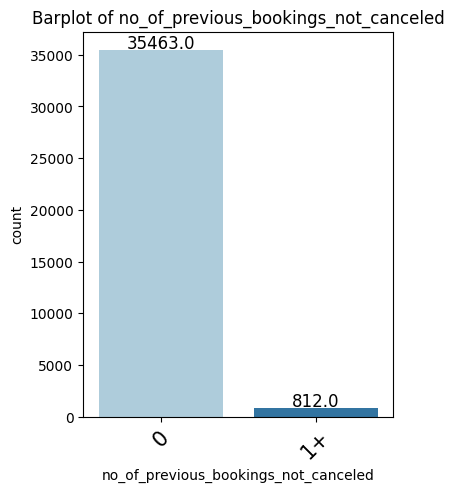

In [ ]:
labeled_barplot(df2, 'no_of_previous_bookings_not_canceled')

###### No. of Previous Bookings Not Cancelled

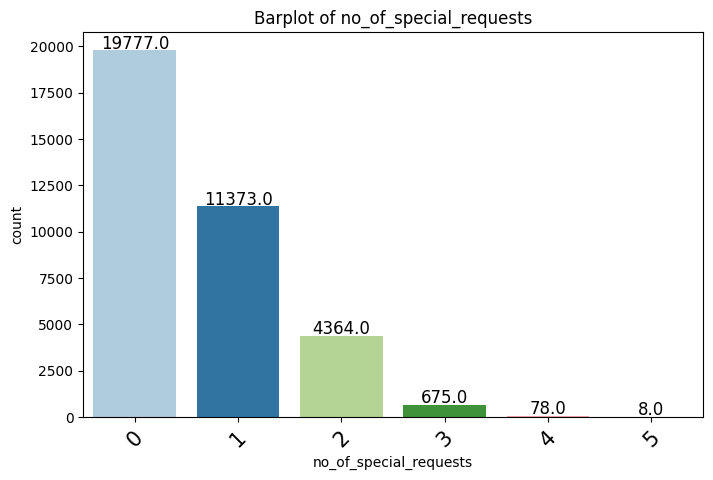

In [ ]:
labeled_barplot(df2, 'no_of_special_requests')

In [ ]:
df2["no_of_special_requests"] = df2["no_of_special_requests"].apply(lambda x: "3+" if x >= 3 else str(x))

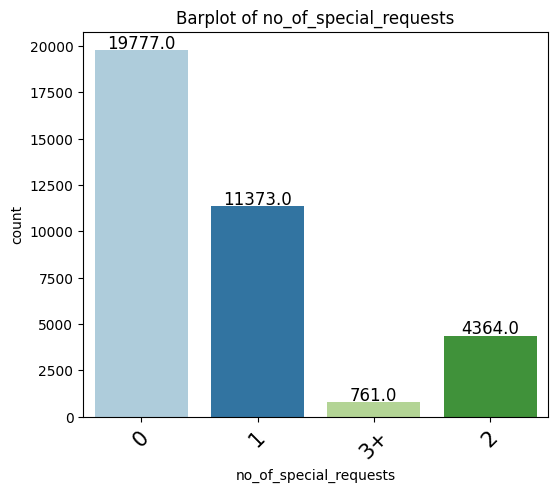

In [ ]:
labeled_barplot(df2, 'no_of_special_requests')

###### Booking Status (Target Variable)

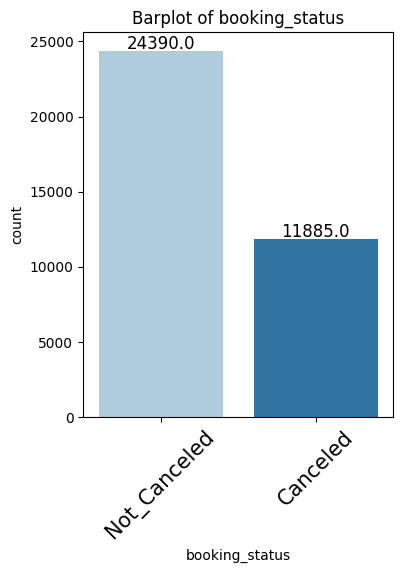

In [ ]:
labeled_barplot(df2, 'booking_status')

In [ ]:
df2["booking_status"] = df2["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

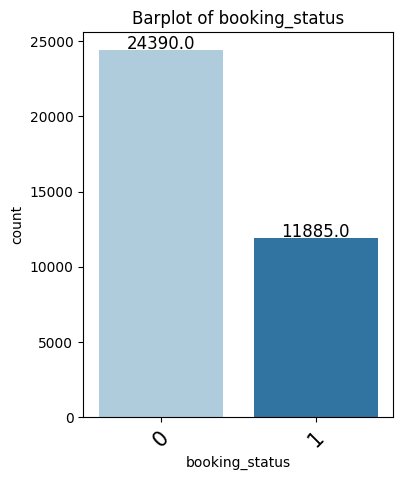

In [ ]:
labeled_barplot(df2, 'booking_status')

##### Convert to object

In addition to our current numerical features, I will convert our arrival month and year to categories. The reason for this is that the numerical relationship of the month is not arithmetical in time. Say April (4) is not 2x Febuary (2).

In [ ]:
columns_to_object = ['arrival_month','arrival_year']

In [ ]:
df2[columns_to_object] = df2[columns_to_object].astype(str)

In [ ]:
df2.head()

no_of_adults no_of_children no_of_weekend_nights no_of_week_nights  \
0            2              0                    1                 2   
1            2              0                   2+                 3   
2          <=1              0                   2+                 1   
3            2              0                    0                 2   
4            2              0                    1                 1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1      224.0   
1      Not Selected                           0        Room_Type 1        5.0   
2       Meal Plan 1                           0        Room_Type 1        1.0   
3       Meal Plan 1                           0        Room_Type 1      211.0   
4      Not Selected                           0        Room_Type 1       48.0   

  arrival_year arrival_month market_segment_type  repeated_guest  \
0         2017            10             Offline               0   
1         2018            11              Online               0   
2         2018             2              Online               0   
3         2018             5              Online               0   
4         2018             4              Online               0   

  no_of_previous_cancellations no_of_previous_bookings_not_canceled  \
0                            0                                    0   
1                            0                                    0   
2                            0                                    0   
3                            0                                    0   
4                            0                                    0   

   avg_price_per_room no_of_special_requests  booking_status  
0               65.00                      0               0  
1              106.68                      1               0  
2               60.00                      0               1  
3              100.00                      0               1  
4               94.50                      0               1

In [ ]:
df2.info() #our final dataset prior to creating dummies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  object 
 1   no_of_children                        36275 non-null  object 
 2   no_of_weekend_nights                  36275 non-null  object 
 3   no_of_week_nights                     36275 non-null  object 
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  object 
 9   arrival_month                         36275 non-null  object 
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

In [ ]:
# specifying the independent  and dependent variables
X = df2.drop(["booking_status"], axis=1)
Y = df2["booking_status"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  object 
 1   no_of_children                        36275 non-null  object 
 2   no_of_weekend_nights                  36275 non-null  object 
 3   no_of_week_nights                     36275 non-null  object 
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  object 
 9   arrival_month                         36275 non-null  object 
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

## EDA

Let's get an overview of how our dataset looks like now

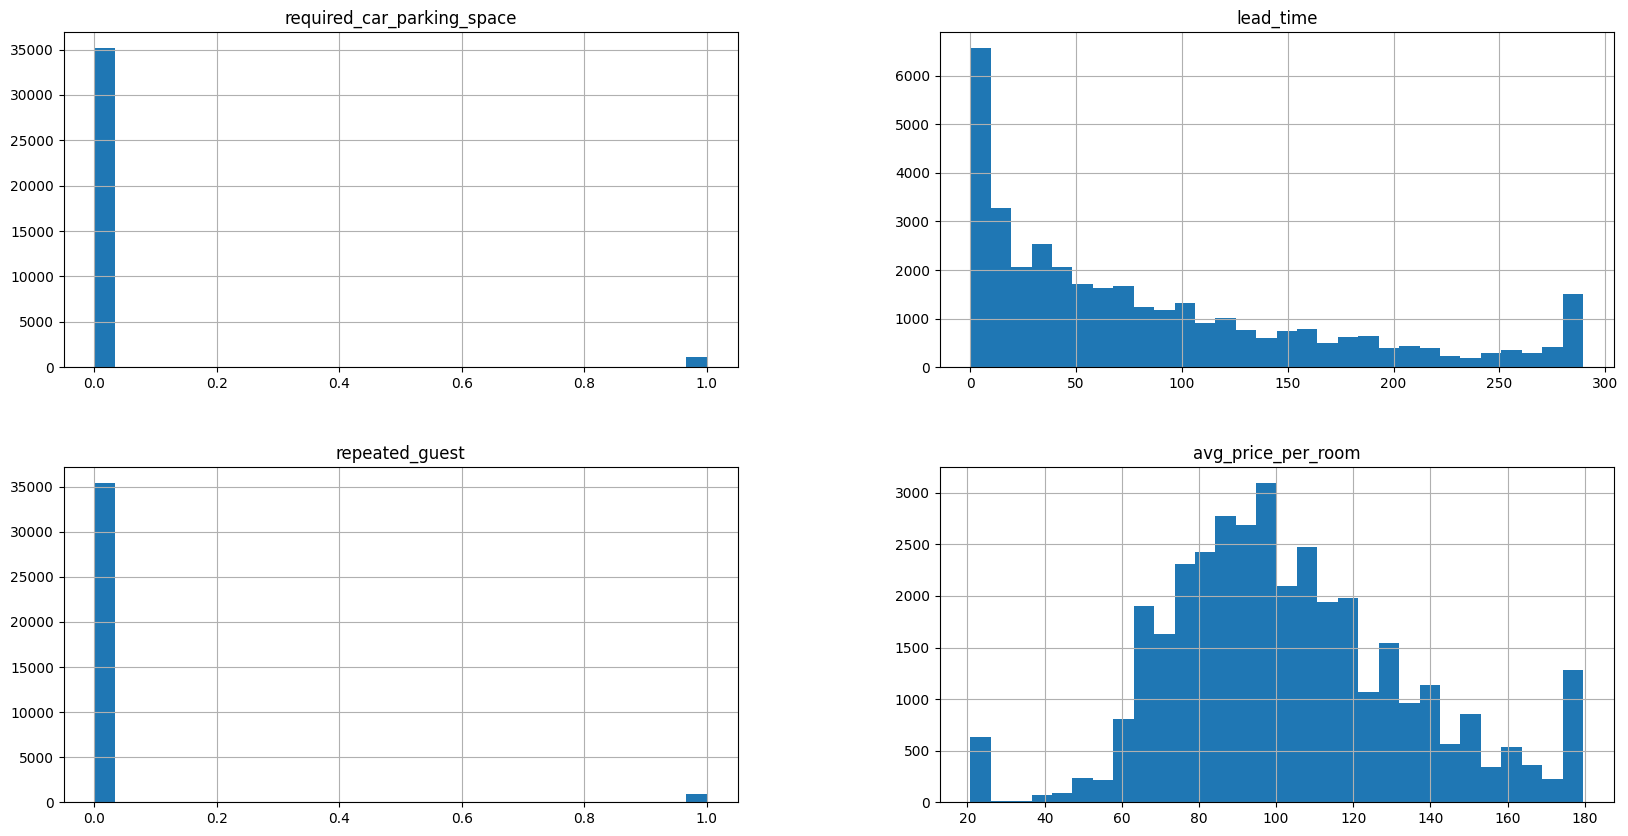

In [ ]:
#then, we will explore the distribution of the numerical features
X.hist(bins=30, figsize=(20,10))
plt.show()

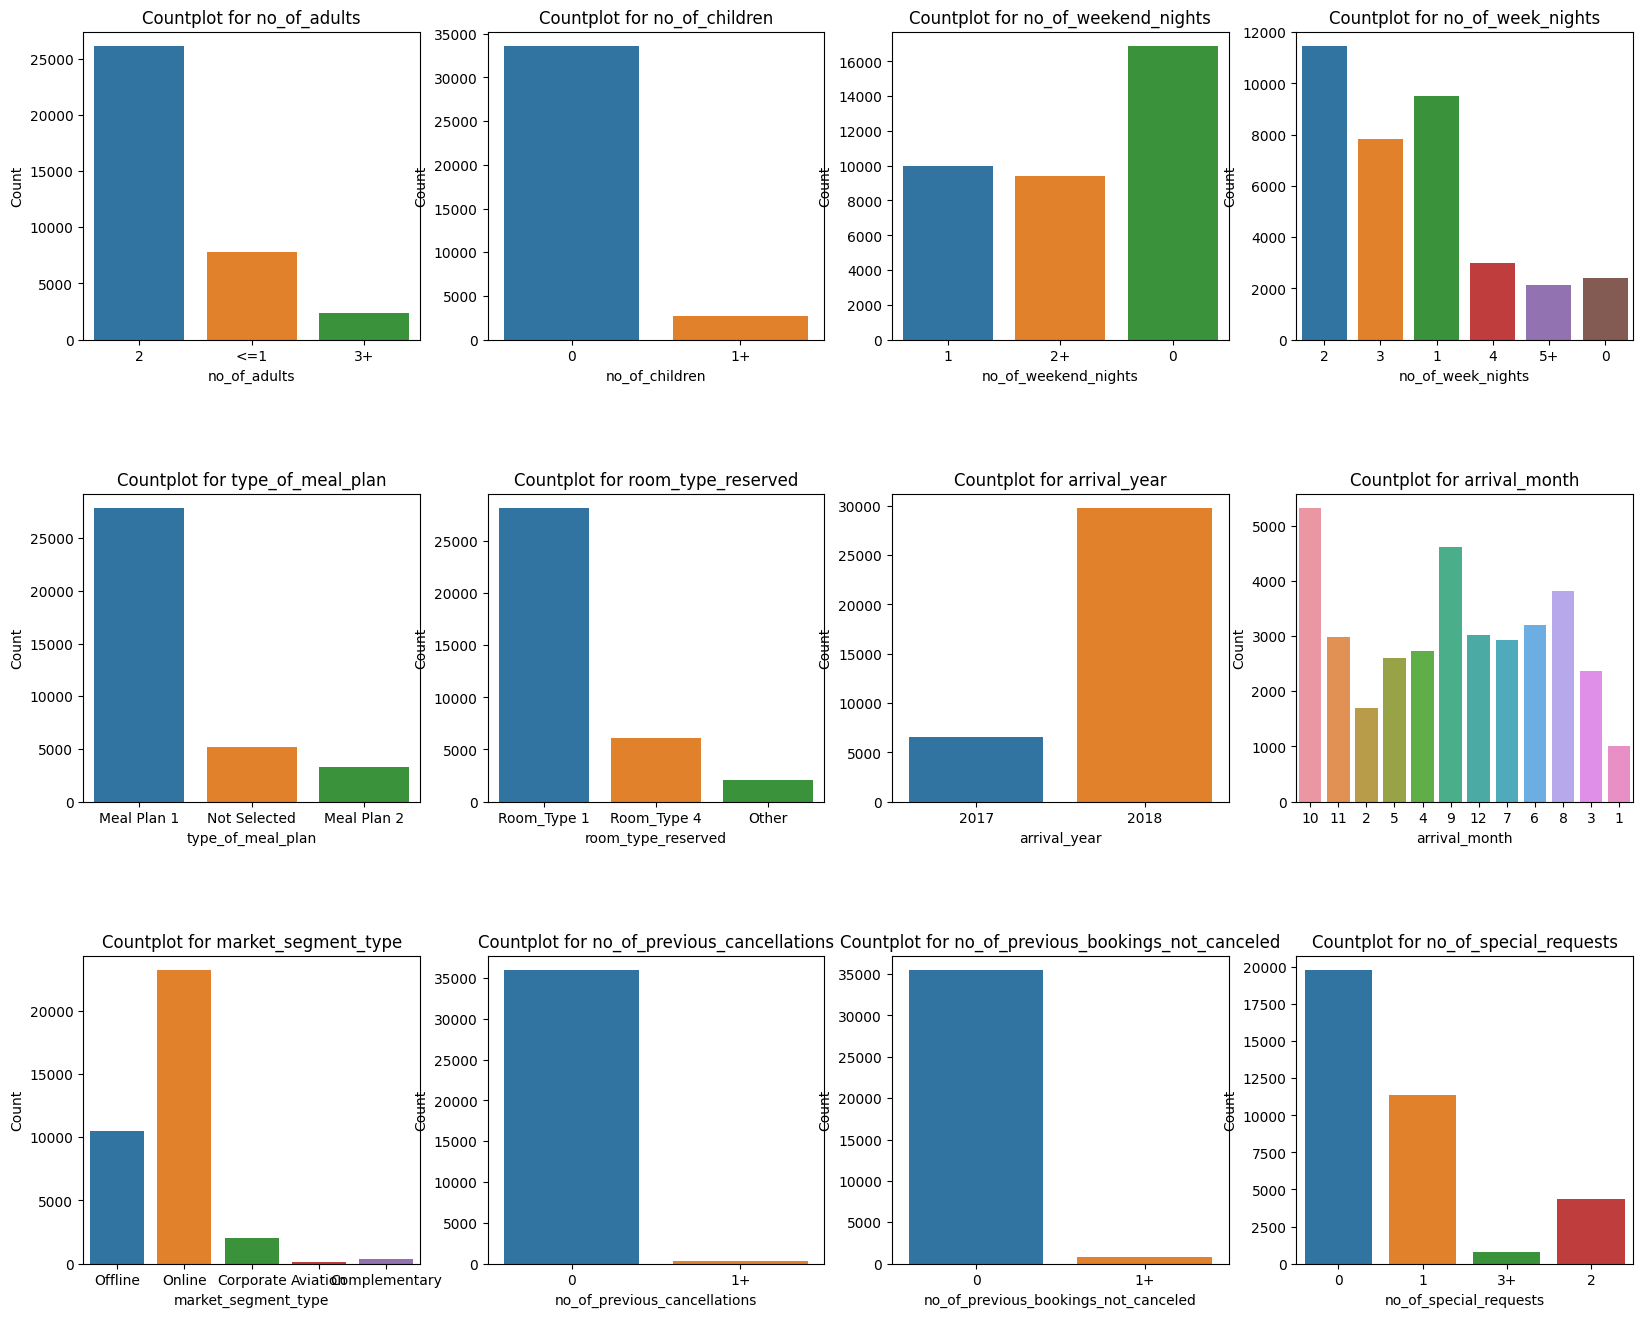

In [ ]:
# Select columns with datatype 'object'
object_columns = X.select_dtypes(include=['object']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 16))
fig.subplots_adjust(hspace=0.5)

# Iterate through object columns and create countplots
for i, column in enumerate(object_columns):
    row, col = divmod(i, 4)
    sns.countplot(x=column, data=X, ax=axes[row, col])
    axes[row, col].set_title(f'Countplot for {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

# Show the plots
plt.show()

# Building a Logistic Regression model

Now that we have our dataset cleaned, we can proceed to create our classification models. First off, I'll build a logistic regression model.

In [ ]:
# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42
)

In [ ]:
pd.set_option('display.max_columns', None)
X.head()

const  required_car_parking_space  lead_time  repeated_guest  \
0    1.0                           0      224.0               0   
1    1.0                           0        5.0               0   
2    1.0                           0        1.0               0   
3    1.0                           0      211.0               0   
4    1.0                           0       48.0               0   

   avg_price_per_room  no_of_adults_3+  no_of_adults_<=1  no_of_children_1+  \
0               65.00                0                 0                  0   
1              106.68                0                 0                  0   
2               60.00                0                 1                  0   
3              100.00                0                 0                  0   
4               94.50                0                 0                  0   

   no_of_weekend_nights_1  no_of_weekend_nights_2+  no_of_week_nights_1  \
0                       1                        0                    0   
1                       0                        1                    0   
2                       0                        1                    1   
3                       0                        0                    0   
4                       1                        0                    1   

   no_of_week_nights_2  no_of_week_nights_3  no_of_week_nights_4  \
0                    1                    0                    0   
1                    0                    1                    0   
2                    0                    0                    0   
3                    1                    0                    0   
4                    0                    0                    0   

   no_of_week_nights_5+  type_of_meal_plan_Meal Plan 2  \
0                     0                              0   
1                     0                              0   
2                     0                              0   
3                     0                              0   
4                     0                              0   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 1  \
0                               0                               1   
1                               1                               1   
2                               0                               1   
3                               0                               1   
4                               1                               1   

   room_type_reserved_Room_Type 4  arrival_year_2018  arrival_month_10  \
0                               0                  0                 1   
1                               0                  1                 0   
2                               0                  1                 0   
3                               0                  1                 0   
4                               0                  1                 0   

   arrival_month_11  arrival_month_12  arrival_month_2  arrival_month_3  \
0                 0                 0                0                0   
1                 1                 0                0                0   
2                 0                 0                1                0   
3                 0                 0                0                0   
4                 0                 0                0                0   

   arrival_month_4  arrival_month_5  arrival_month_6  arrival_month_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                1                0                0   
4                1                0                0                0   

   arrival_month_8  arrival_month_9  market_segment_type_Complementary  \
0                0                0                                  0   
1                0

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 40)
Shape of test set :  (10883, 40)
Percentage of classes in training set:
0    0.673992
1    0.326008
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.668566
1    0.331434
Name: booking_status, dtype: float64


### Model performance evaluation

**Model can make wrong predictions as**:

1. Predicting a guest has cancelled a book but in reality the guest has not cancelled the booking. (False Positive, Type 1 Error)

2. Predicting a guest hasn't cancelled the booking but in reality cancelled the booking. (False Negative, Type 2 Error)

**Which case is more important?**

* While both cases have some importance, the client wants to be able to predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

* So in essence, minimizing False Negatives is what we should be focusing on

**How to reduce this loss?**

* To do so, the `recall` score should be maximized as the greater the recall, the higher the chances of reducing both False Negatives and identifying out of all the positives, how many did the model predict correctly?

  * `recall` is computed as
  $$recall = \frac{True Positive (TP) }{True Positive (TP) + False Negative (FN)}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## 1 - Logistic Regression Model

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25352
Method:                           MLE   Df Model:                           39
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.3512
Time:                        05:33:25   Log-Likelihood:                -10401.
converged:                      False   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -5.5061      0.386    -14.256      0.000      -6.263      -4.749
required_car_parking_space                 -

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Observations**

- Negative values of the coefficient show that the probability of a guest canceling their booking decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of a guest canceling their booking increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

#### Checking performance on training dataset

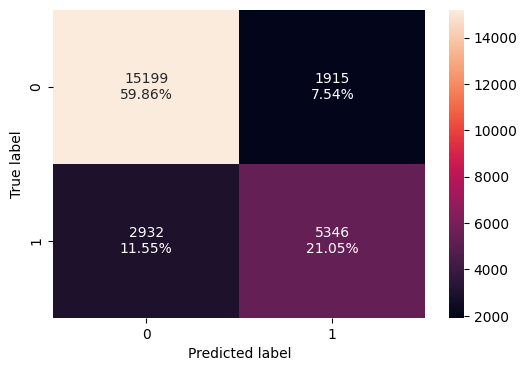

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.809113  0.645808   0.736262  0.688075

#### Checking performance on test dataset

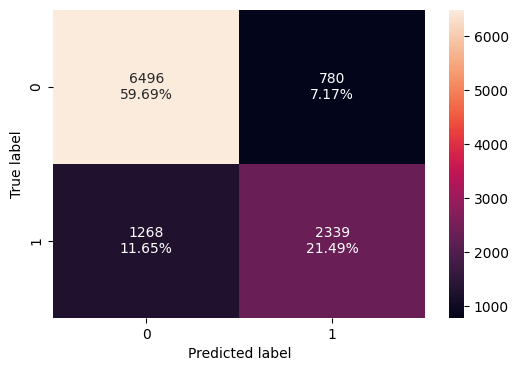

In [ ]:
confusion_matrix_statsmodels(lg, X_test, y_test)

In [ ]:
print("Test performance:")
model_performance_classification_statsmodels(lg, X_test, y_test)

Test performance:


Accuracy    Recall  Precision       F1
0  0.811817  0.648461    0.74992  0.69551

**Observations**

- The recall score of the model is ~0.64 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

## 2 - LR model No Multicollinearity

In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

#### Calculating and removing values with high VIF

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
).sort_values(ascending=False)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                      417.229977
market_segment_type_Online                  71.941121
market_segment_type_Offline                 64.675254
market_segment_type_Corporate               17.204049
repeated_guest                              14.274762
no_of_previous_bookings_not_canceled_1+     11.557139
arrival_month_10                             6.193463
arrival_month_9                              5.784871
arrival_month_8                              4.825148
no_of_week_nights_2                          4.414350
market_segment_type_Complementary            4.401545
room_type_reserved_Room_Type 1               4.321841
arrival_month_6                              4.203218
room_type_reserved_Room_Type 4               4.134078
no_of_week_nights_1                          4.035686
arrival_month_7                              4.023493
arrival_month_12                             3.876623
arrival_month_11                             3.

Looking at the correlation, it appears that `repeated_guest` have a high VIF alongside the `market_segment_type`.

When plotting `repeated_guest` against `market_segment_type`, we see that there's a high correlation between the two. Guests that book Online and Offline tend to be first time guests by ~99% of the time. Online and Offline bookings account for 94% of the total bookings.

As a result, I'll first try and remove `market_segment_type_Corporate` because that feature has the least amount of observations. Then, remove `repeat_guest` and see if that has an impact in the multicollinearity.



**Removing `market_segment_type_Corporate`**

In [ ]:
X_train1 = X_train.drop("market_segment_type_Corporate", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
).sort_values(ascending=False)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                      121.671458
repeated_guest                              14.274677
no_of_previous_bookings_not_canceled_1+     11.549334
market_segment_type_Online                   6.603426
arrival_month_10                             6.187826
market_segment_type_Offline                  5.942543
arrival_month_9                              5.782342
arrival_month_8                              4.823792
no_of_week_nights_2                          4.413386
room_type_reserved_Room_Type 1               4.321816
arrival_month_6                              4.202165
room_type_reserved_Room_Type 4               4.127170
no_of_week_nights_1                          4.035445
arrival_month_7                              4.022646
arrival_month_12                             3.876171
arrival_month_11                             3.862979
no_of_week_nights_3                          3.785034
arrival_month_5                              3.

Removing the `market_segment_type_Corporate` did substantially drop the VIF factor. Now, let's look at whether removing `repeated_guest` further drops our highest VIF.

**Removing `repeated_guest`**

In [ ]:
X_train2 = X_train1.drop("repeated_guest", axis=1)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
).sort_values(ascending=False)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

const                                      121.485164
market_segment_type_Online                   6.597819
arrival_month_10                             6.187346
market_segment_type_Offline                  5.940977
arrival_month_9                              5.782342
arrival_month_8                              4.823618
no_of_week_nights_2                          4.407021
room_type_reserved_Room_Type 1               4.321620
arrival_month_6                              4.202110
room_type_reserved_Room_Type 4               4.127038
no_of_week_nights_1                          4.028878
arrival_month_7                              4.022592
arrival_month_12                             3.875978
arrival_month_11                             3.862954
no_of_week_nights_3                          3.783638
arrival_month_5                              3.632957
arrival_month_4                              3.599934
arrival_month_3                              3.

**Removing `market_segment_type_Online`**

In [ ]:
# X_train3 = X_train2.drop("market_segment_type_Online", axis=1)
# vif_series3 = pd.Series(
#     [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
#     index=X_train3.columns,
# ).sort_values(ascending=False)
# print("Series before feature selection: \n\n{}\n".format(vif_series3))

**Removing `arrival_month_10`**

In [ ]:
# X_train4 = X_train3.drop("arrival_month_10", axis=1)
# vif_series4 = pd.Series(
#     [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
#     index=X_train4.columns,
# ).sort_values(ascending=False)
# print("Series before feature selection: \n\n{}\n".format(vif_series4))

In [ ]:
X_final = X_train2.copy()

We have removed all features with a VIF score greater than 5. With this in mind, I can proceed to develop a second iteration of the model

#### LR Model no Multicolinearity

In [ ]:
logit2 = sm.Logit(y_train, X_final.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25354
Method:                           MLE   Df Model:                           37
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.3504
Time:                        05:33:41   Log-Likelihood:                -10414.
converged:                      False   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -6.4141      0.299    -21.417      0.000      -7.001      -5.827
required_car_parking_space                 -

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_final, y_train)

Training performance:


Accuracy    Recall  Precision       F1
0  0.809704  0.647258   0.737001  0.68922

#### Removing high p-value variables

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
cols = X_final.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_final[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'required_car_parking_space', 'lead_time', 'avg_price_per_room', 'no_of_adults_3+', 'no_of_adults_<=1', 'no_of_weekend_nights_2+', 'no_of_week_nights_1', 'no_of_week_nights_2', 'no_of_week_nights_3', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 4', 'arrival_year_2018', 'arrival_month_10', 'arrival_month_11', 'arrival_month_12', 'arrival_month_2', 'arrival_month_3', 'arrival_month_4', 'arrival_month_5', 'arrival_month_6', 'arrival_month_7', 'arrival_month_8', 'arrival_month_9', 'market_segment_type_Offline', 'market_segment_type_Online', 'no_of_previous_bookings_not_canceled_1+', 'no_of_special_requests_1', 'no_of_special_requests_2']


In [ ]:
X_final_1 = X_final[selected_features]

## 3 - Final Logistic Regression Model

In [ ]:
logit3 = sm.Logit(y_train, X_final_1.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25361
Method:                           MLE   Df Model:                           30
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.3169
Time:                        05:33:44   Log-Likelihood:                -10950.
converged:                       True   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -6.2949      0.288    -21.852      0.000      -6.859      -5.730
required_car_parking_space                 -

#### Checking model performance on training set

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_final_1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.796983  0.614762   0.721332  0.663797

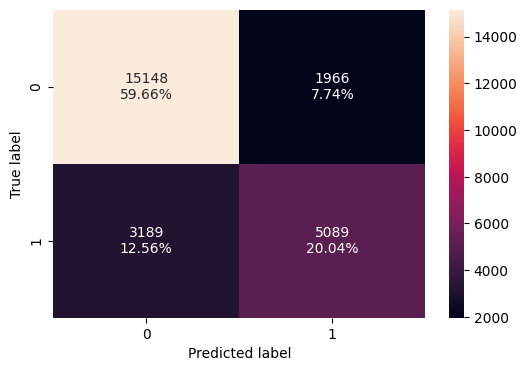

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_final_1, y_train)

#### Checking model performance on test set

We have to first drop the columns from the test set that were dropped from the training set.

In [ ]:
#dropping missing columns from test dataset
X_test3 = X_test[list(X_final_1.columns)]

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.800239  0.619629   0.735924  0.672787

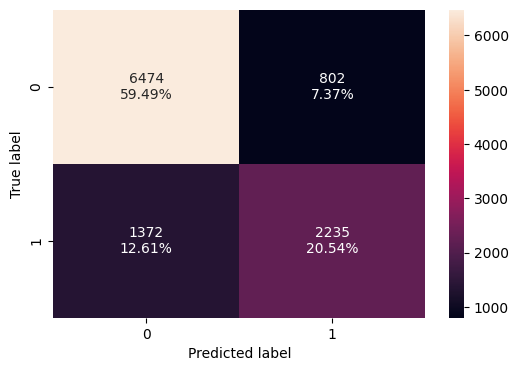

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

- The model is giving a good recall score of ~0.61 and ~0.62 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the recall score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to see if a balance between the two can yield a higher recall score

## 4 - ROC Curve and ROC-AUC

* ROC-AUC on training set

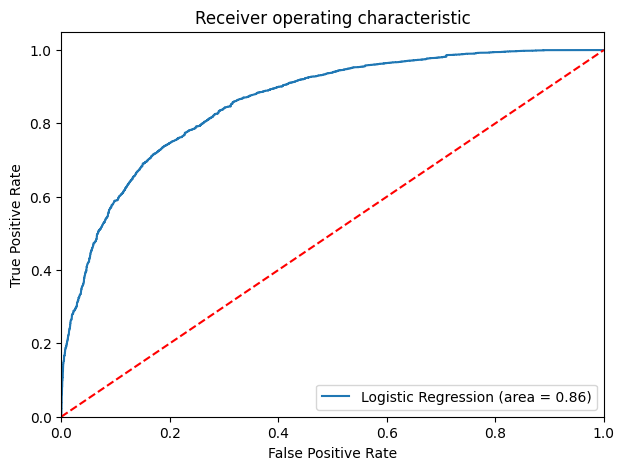

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_final_1))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_final_1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set with an AUC of 0.86.

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_final_1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("The optimal threshold is:", "{:.3f}".format(optimal_threshold_auc_roc))

The optimal threshold is: 0.368


#### Checking model performance on training set

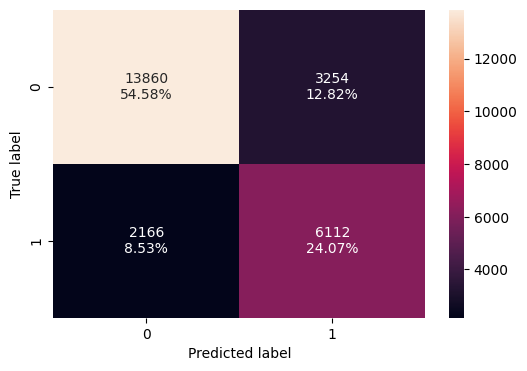

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_final_1, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_final_1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.786547  0.738343   0.652573  0.692813

* The precision of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

#### Checking model performance on test set

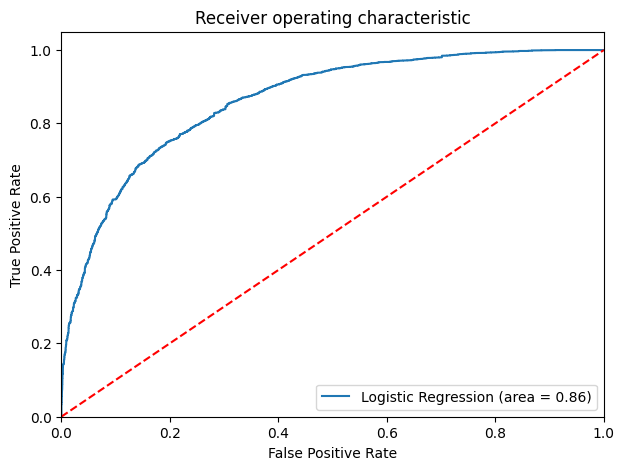

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0   0.79004  0.734128   0.666331  0.698589

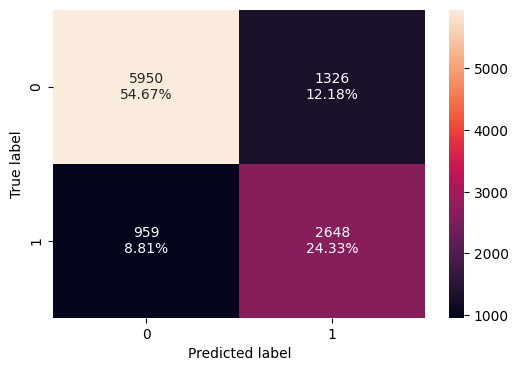

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

## 5 - Precision-Recall Curve

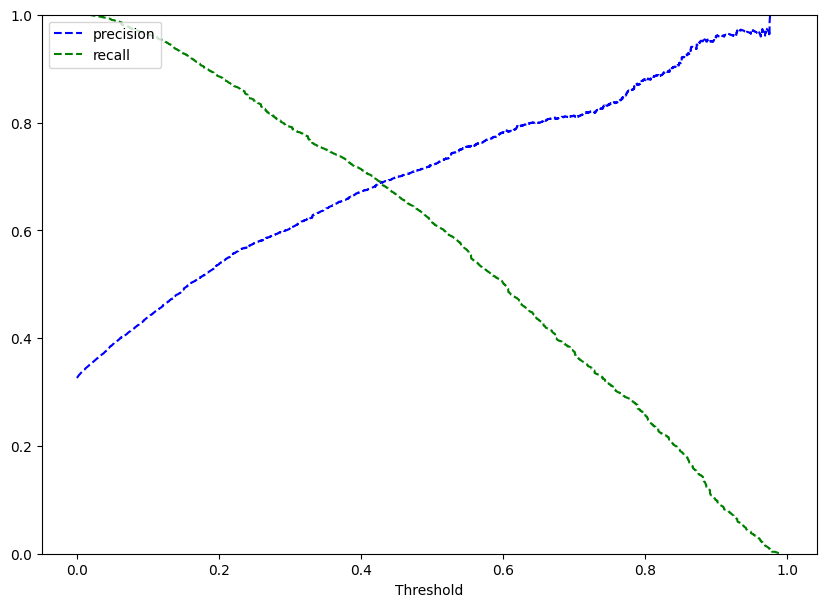

In [ ]:
y_scores = lg3.predict(X_final_1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# Find the threshold value at the intersection
intersection_index = np.argmax(prec == rec)
optimal_threshold_curve = tre[intersection_index]
print("The optimal threshold is:", "{:.3f}".format(optimal_threshold_curve))

The optimal threshold is: 0.428


* At the threshold of 0.422, we get balanced recall and precision.


#### Checking model performance on training set

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_final_1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision       F1
0  0.797613  0.689539   0.689622  0.68958

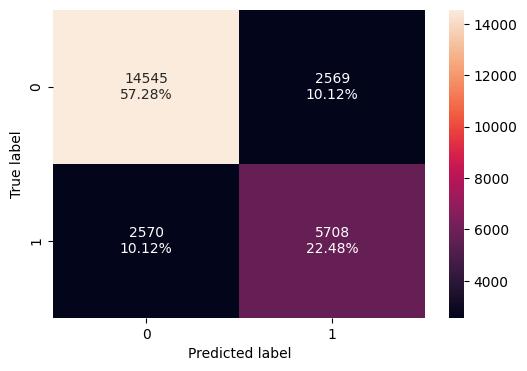

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_final_1, y_train, threshold=optimal_threshold_curve)

* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

#### Checking model performance on test set

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy   Recall  Precision        F1
0  0.800698  0.68672   0.704494  0.695493

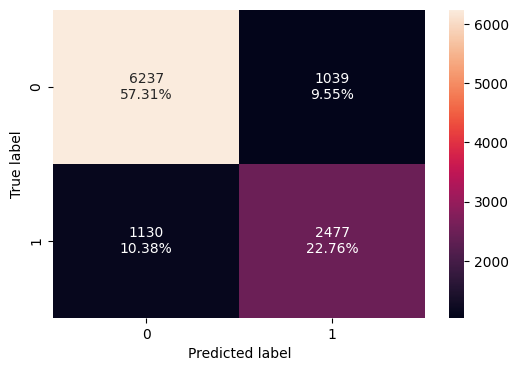

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression - default threshold (0.5)",
    "Logistic Regression- ROC_AUC Optimal Threshold (0.33)",
    "Logistic Regression- Recall_Precision_Int Threshold (0.422)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression - default threshold (0.5)  \
Accuracy                                        0.796983   
Recall                                          0.614762   
Precision                                       0.721332   
F1                                              0.663797   

           Logistic Regression- ROC_AUC Optimal Threshold (0.33)  \
Accuracy                                            0.786547       
Recall                                              0.738343       
Precision                                           0.652573       
F1                                                  0.692813       

           Logistic Regression- Recall_Precision_Int Threshold (0.422)  
Accuracy                                            0.797613            
Recall                                              0.689539            
Precision                                           0.689622            
F1                                                  0.689580

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = models_train_comp_df.columns

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression - default threshold (0.5)  \
Accuracy                                        0.800239   
Recall                                          0.619629   
Precision                                       0.735924   
F1                                              0.672787   

           Logistic Regression- ROC_AUC Optimal Threshold (0.33)  \
Accuracy                                            0.790040       
Recall                                              0.734128       
Precision                                           0.666331       
F1                                                  0.698589       

           Logistic Regression- Recall_Precision_Int Threshold (0.422)  
Accuracy                                            0.800698            
Recall                                              0.686720            
Precision                                           0.704494            
F1                                                  0.695493

- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with the ROC_AUC Optimal Threshold (0.36) is giving the best F1 score. Therefore it can be selected as the final model


# Building a Decision Tree model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## 1 - Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.993659  0.983933   0.996574  0.990213

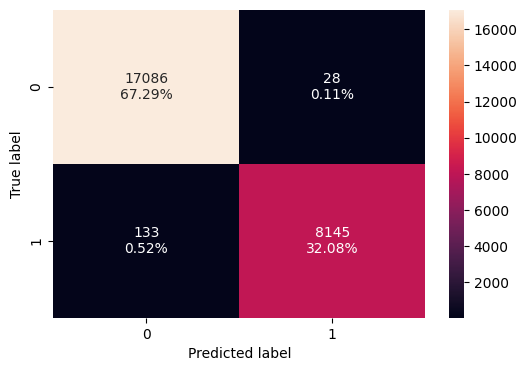

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on test set

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.861619  0.795952    0.78852  0.792219

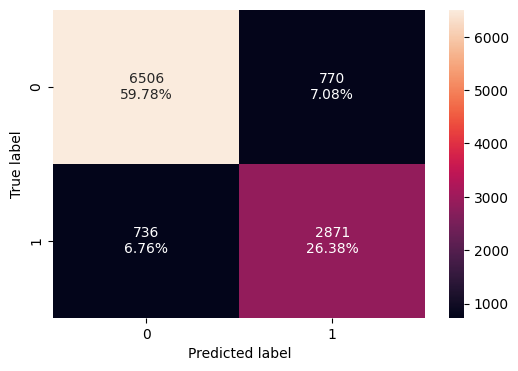

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

#### Visualizing the Decision Tree

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['const', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'avg_price_per_room', 'no_of_adults_3+', 'no_of_adults_<=1', 'no_of_children_1+', 'no_of_weekend_nights_1', 'no_of_weekend_nights_2+', 'no_of_week_nights_1', 'no_of_week_nights_2', 'no_of_week_nights_3', 'no_of_week_nights_4', 'no_of_week_nights_5+', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 4', 'arrival_year_2018', 'arrival_month_10', 'arrival_month_11', 'arrival_month_12', 'arrival_month_2', 'arrival_month_3', 'arrival_month_4', 'arrival_month_5', 'arrival_month_6', 'arrival_month_7', 'arrival_month_8', 'arrival_month_9', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'no_of_previous_cancellations_1+', 'no_of_previous_bookings_not_canceled_1+', 'no_of_special_requests_1', 'no_of_special_requests_2', 'no_of_special_requests_3+']


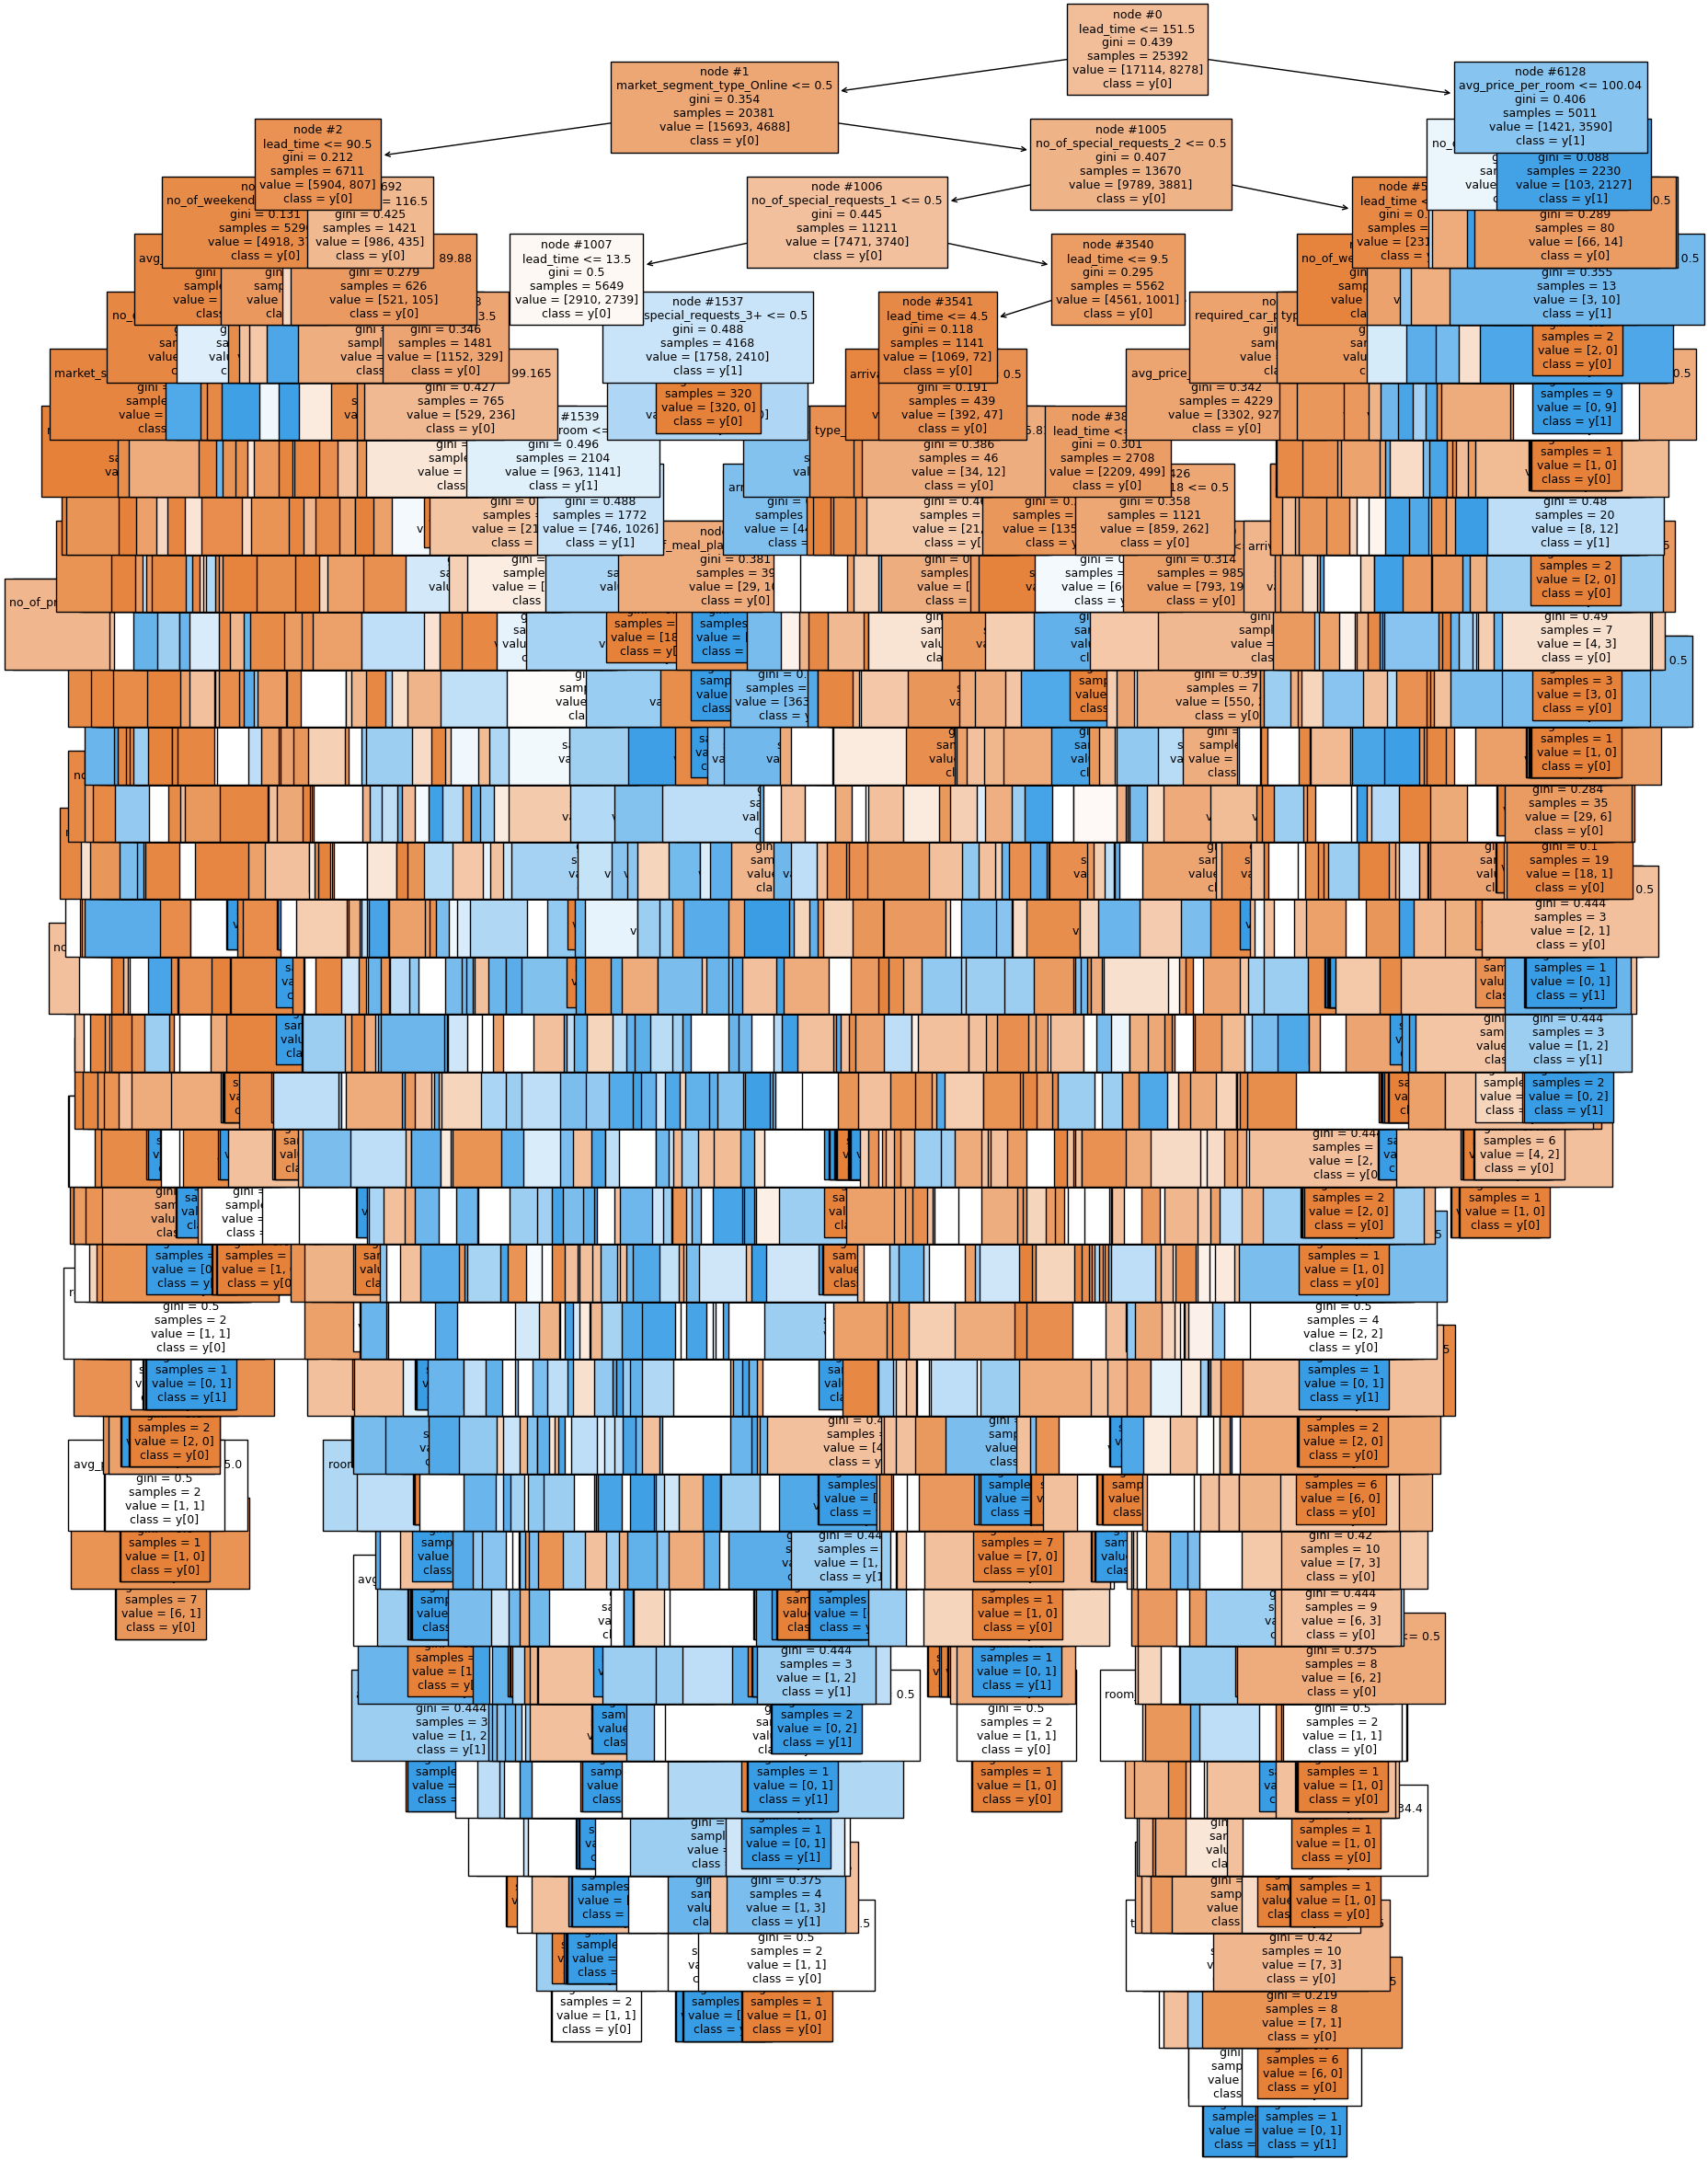

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- market_segment_type_Online <= 0.50
|   |   |--- lead_time <= 90.50
|   |   |   |--- no_of_weekend_nights_2+ <= 0.50
|   |   |   |   |--- avg_price_per_room <= 178.44
|   |   |   |   |   |--- no_of_weekend_nights_1 <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 107.00
|   |   |   |   |   |   |   |   |   |--- arrival_month_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [200.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- arrival_month_5 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Complementary <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Complementary >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
| 

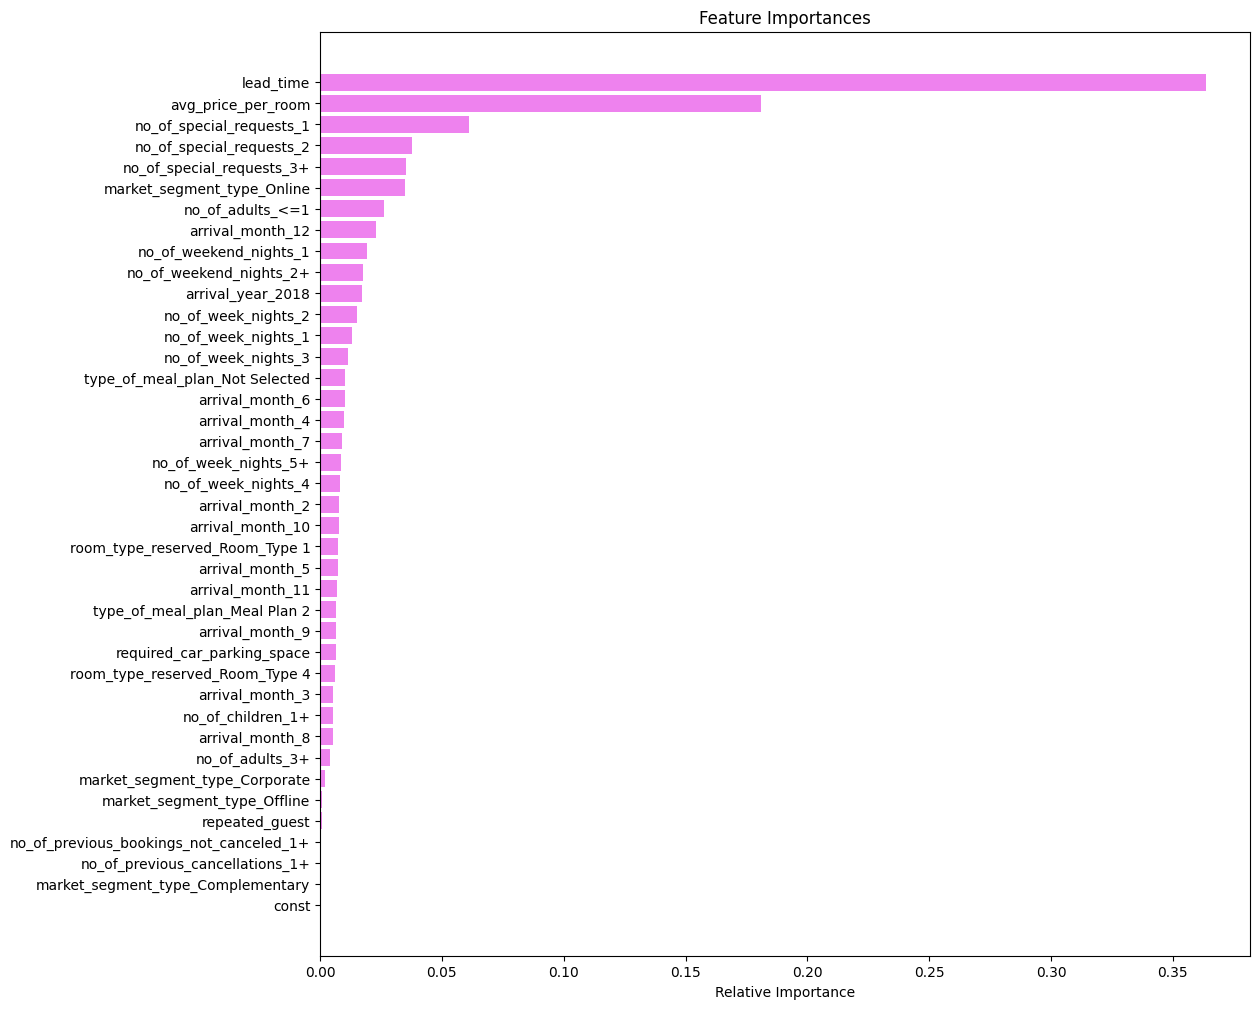

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, lead time is by far the most important variable for predicting the guest cancellations.

**The tree above is very complex, such a tree often overfits. We will proceed to do some prunning to improve its forecasting performance**

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 3

## 2 - Pre-prunning

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

# parameters = {
#     "max_depth": [np.arange(2, 50, 5), None],
#     "criterion": ["entropy", "gini"],
#     "splitter": ["best", "random"],
#     "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
# }

parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

### Checking performance on training set

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.809192  0.707055   0.707482  0.707268

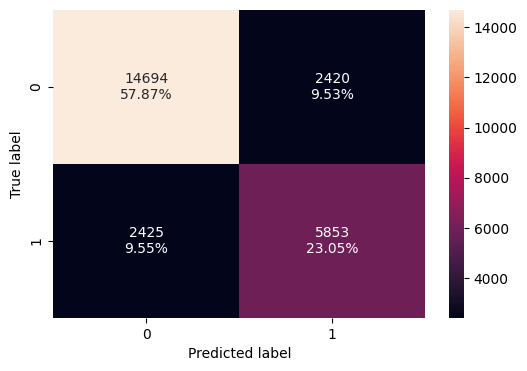

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* The Recall has improved on the training set as compared to the initial model.

### Checking model performance on test set

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision       F1
0  0.814665  0.700305   0.729636  0.71467

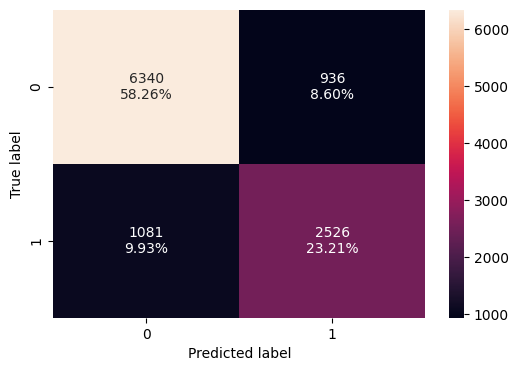

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

### Visualizing the Decision Tree

* After hyperparameter tuning the model has performance has remained same and the model has become simpler.

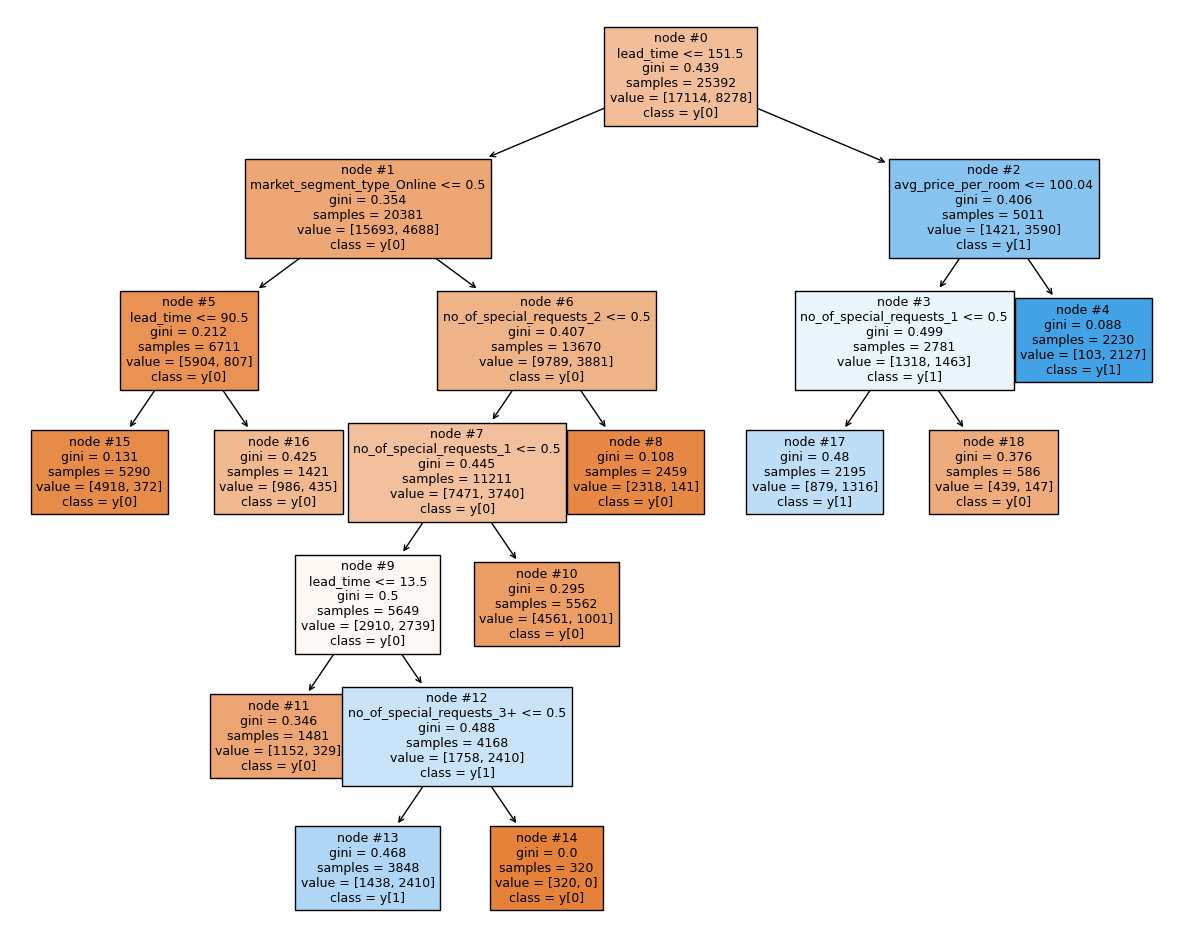

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- market_segment_type_Online <= 0.50
|   |   |--- lead_time <= 90.50
|   |   |   |--- weights: [4918.00, 372.00] class: 0
|   |   |--- lead_time >  90.50
|   |   |   |--- weights: [986.00, 435.00] class: 0
|   |--- market_segment_type_Online >  0.50
|   |   |--- no_of_special_requests_2 <= 0.50
|   |   |   |--- no_of_special_requests_1 <= 0.50
|   |   |   |   |--- lead_time <= 13.50
|   |   |   |   |   |--- weights: [1152.00, 329.00] class: 0
|   |   |   |   |--- lead_time >  13.50
|   |   |   |   |   |--- no_of_special_requests_3+ <= 0.50
|   |   |   |   |   |   |--- weights: [1438.00, 2410.00] class: 1
|   |   |   |   |   |--- no_of_special_requests_3+ >  0.50
|   |   |   |   |   |   |--- weights: [320.00, 0.00] class: 0
|   |   |   |--- no_of_special_requests_1 >  0.50
|   |   |   |   |--- weights: [4561.00, 1001.00] class: 0
|   |   |--- no_of_special_requests_2 >  0.50
|   |   |   |--- weights: [2318.00, 141.00] class: 0
|--- lead_time >  151.50
|  

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                              Imp
lead_time                                0.552460
no_of_special_requests_1                 0.151855
avg_price_per_room                       0.108552
no_of_special_requests_2                 0.073785
market_segment_type_Online               0.057795
no_of_special_requests_3+                0.055554
arrival_month_8                          0.000000
arrival_month_2                          0.000000
arrival_month_3                          0.000000
arrival_month_4                          0.000000
arrival_month_5                          0.000000
arrival_month_6                          0.000000
arrival_month_7                          0.000000
market_segment_type_Corporate            0.000000
arrival_month_9                          0.000000
market_segment_type_Complementary        0.000000
arrival_month_11                         0.000000
market_segment_type_Offline              0.000000
no_of_previous_cancellations_1+          0.000000


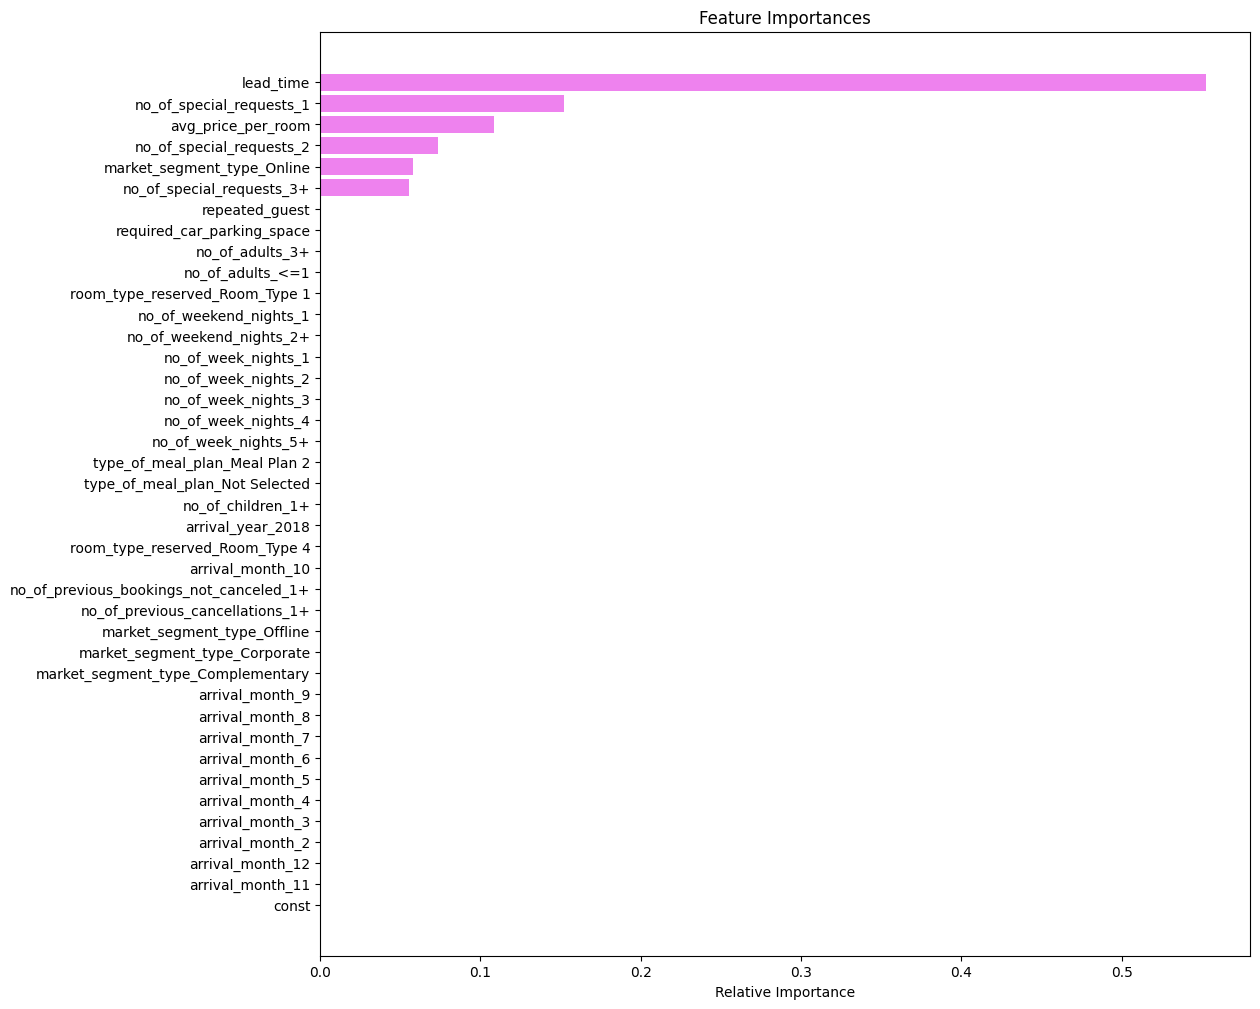

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* We are getting a simplified tree after pre-pruning with improved performance and less features.

## 3 - Post-Prunning (Cost Complexity Prunning)

As we started with defining a set of parameters to optimize our model, we'll now move backwards and prune accordingly to mimize the level of impurities in the model

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008324
1    -5.421011e-20    0.008324
2     3.563177e-07    0.008324
3     4.028898e-07    0.008325
4     7.032586e-07    0.008326
...            ...         ...
1474  9.127553e-03    0.293615
1475  1.091213e-02    0.304527
1476  1.404635e-02    0.346666
1477  1.783521e-02    0.364502
1478  7.495203e-02    0.439454

[1479 rows x 2 columns]

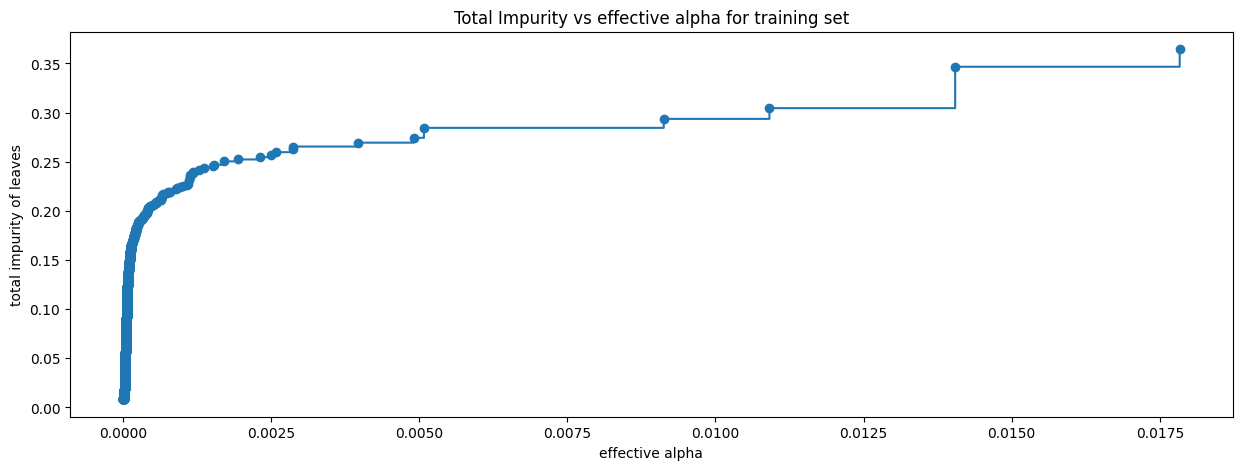

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

However, we have some alphas that are less than 0. Given the nature of the model, these need to be corrected and analyzed individually. Let us first look at these:

In [ ]:
value_less_than_0 = ccp_alphas[ccp_alphas<0]
value_less_than_0


array([-5.42101086e-20])

Notice how only one value is less than zero. However, this is more of a technicality and it is basically 0. As a result, I'll just convert it to 0

In [ ]:
ccp_alphas[ccp_alphas < 0] = 0

In [ ]:
ccp_alphas[ccp_alphas<0]

array([], dtype=float64)

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07495203066381134



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

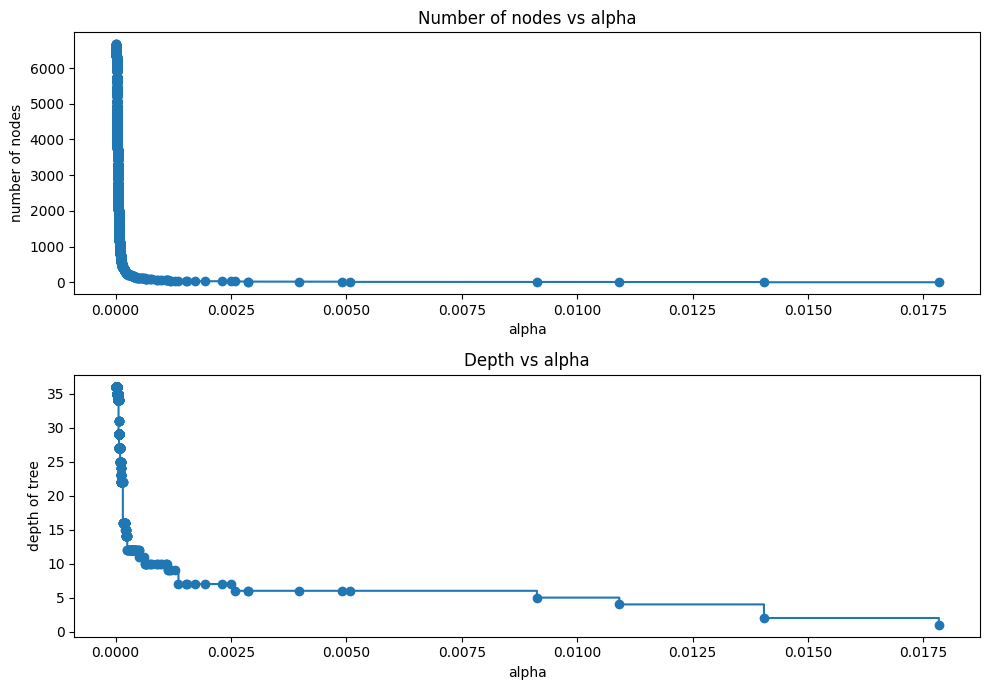

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

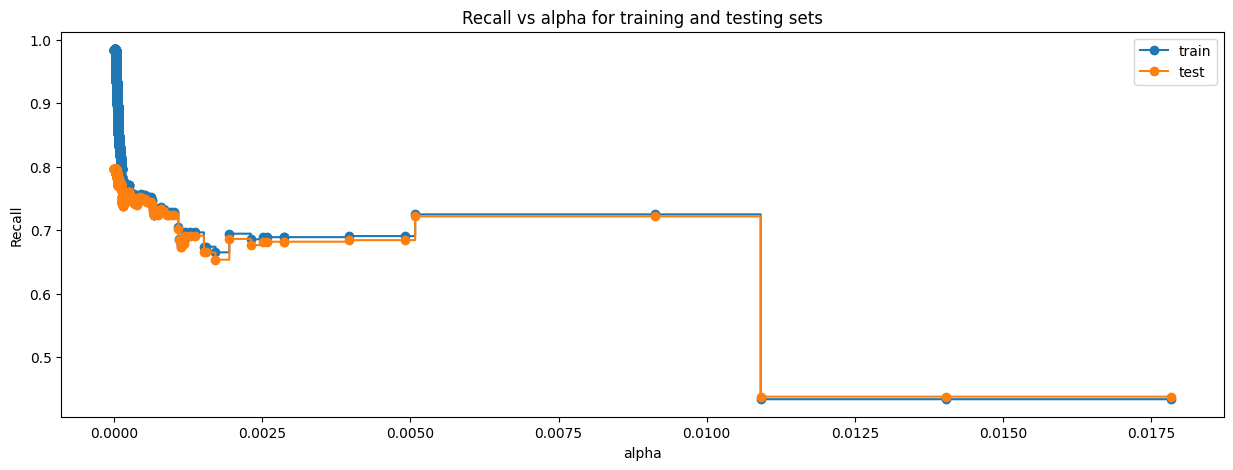

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.4873146950552198e-05, random_state=1)


### Checking model performance on training set

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0  0.991848  0.981759   0.993157  0.987425

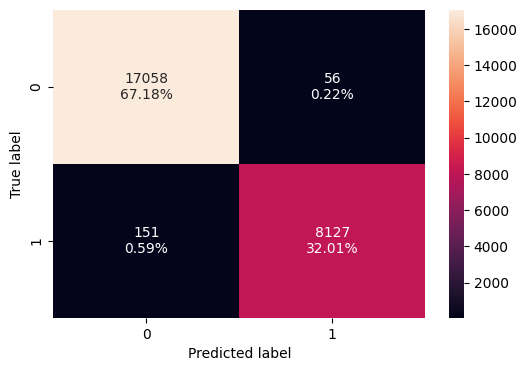

In [ ]:
confusion_matrix_statsmodels(best_model, X_train, y_train)

### Checking model performance on test set

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision       F1
0  0.861987  0.796507   0.789069  0.79277

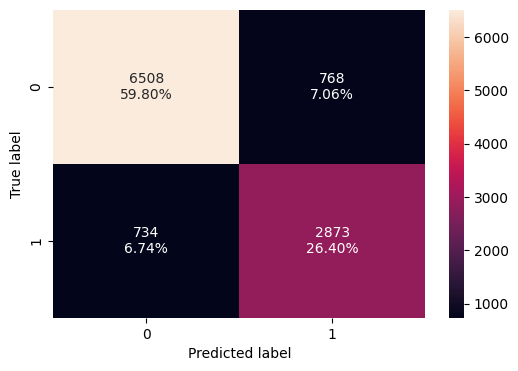

In [ ]:
confusion_matrix_statsmodels(best_model, X_test, y_test)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.

### Visualizing the Decision Tree

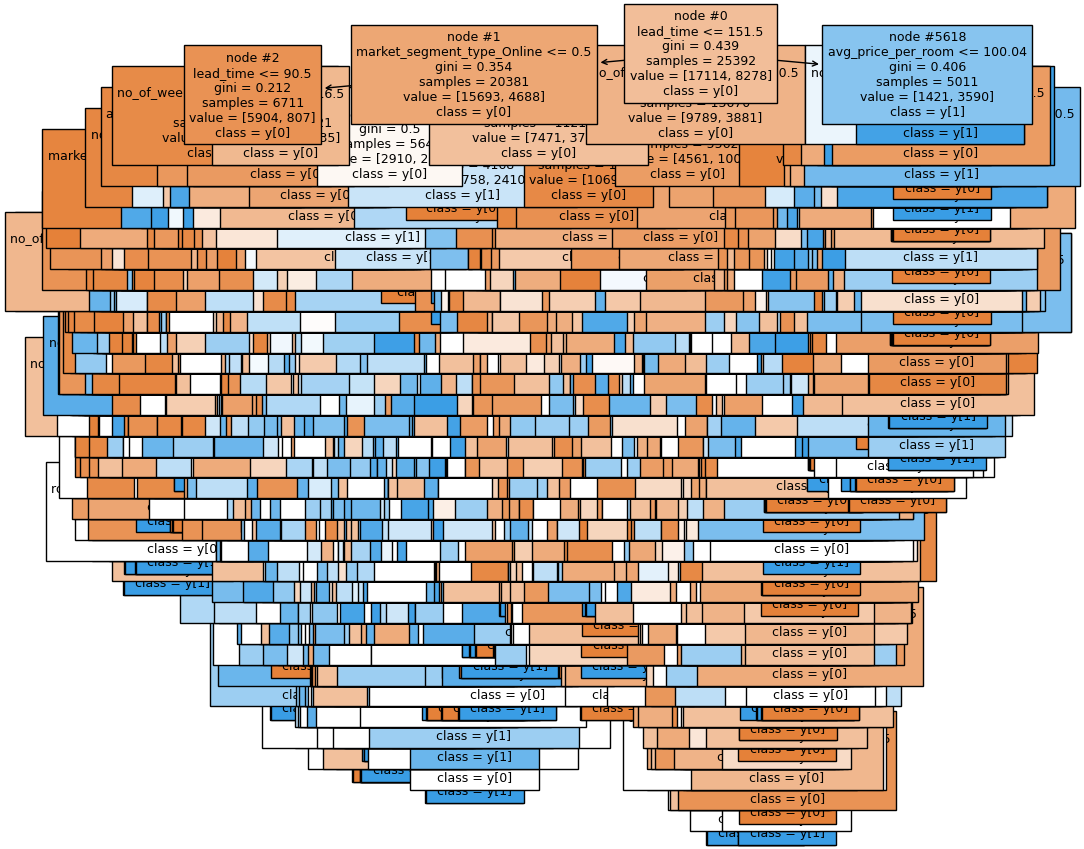

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- market_segment_type_Online <= 0.50
|   |   |--- lead_time <= 90.50
|   |   |   |--- no_of_weekend_nights_2+ <= 0.50
|   |   |   |   |--- avg_price_per_room <= 178.44
|   |   |   |   |   |--- no_of_weekend_nights_1 <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 107.00
|   |   |   |   |   |   |   |   |   |--- arrival_month_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [200.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- arrival_month_5 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Complementary <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Complementary >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
| 

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                              Imp
lead_time                                0.363565
avg_price_per_room                       0.180732
no_of_special_requests_1                 0.061854
no_of_special_requests_2                 0.038056
no_of_special_requests_3+                0.035821
market_segment_type_Online               0.035320
no_of_adults_<=1                         0.026135
arrival_month_12                         0.023092
no_of_weekend_nights_1                   0.019253
no_of_weekend_nights_2+                  0.017299
arrival_year_2018                        0.017031
no_of_week_nights_2                      0.015072
no_of_week_nights_1                      0.012499
no_of_week_nights_3                      0.011203
type_of_meal_plan_Not Selected           0.010094
arrival_month_6                          0.010062
arrival_month_4                          0.009918
arrival_month_7                          0.008923
no_of_week_nights_5+                     0.008607


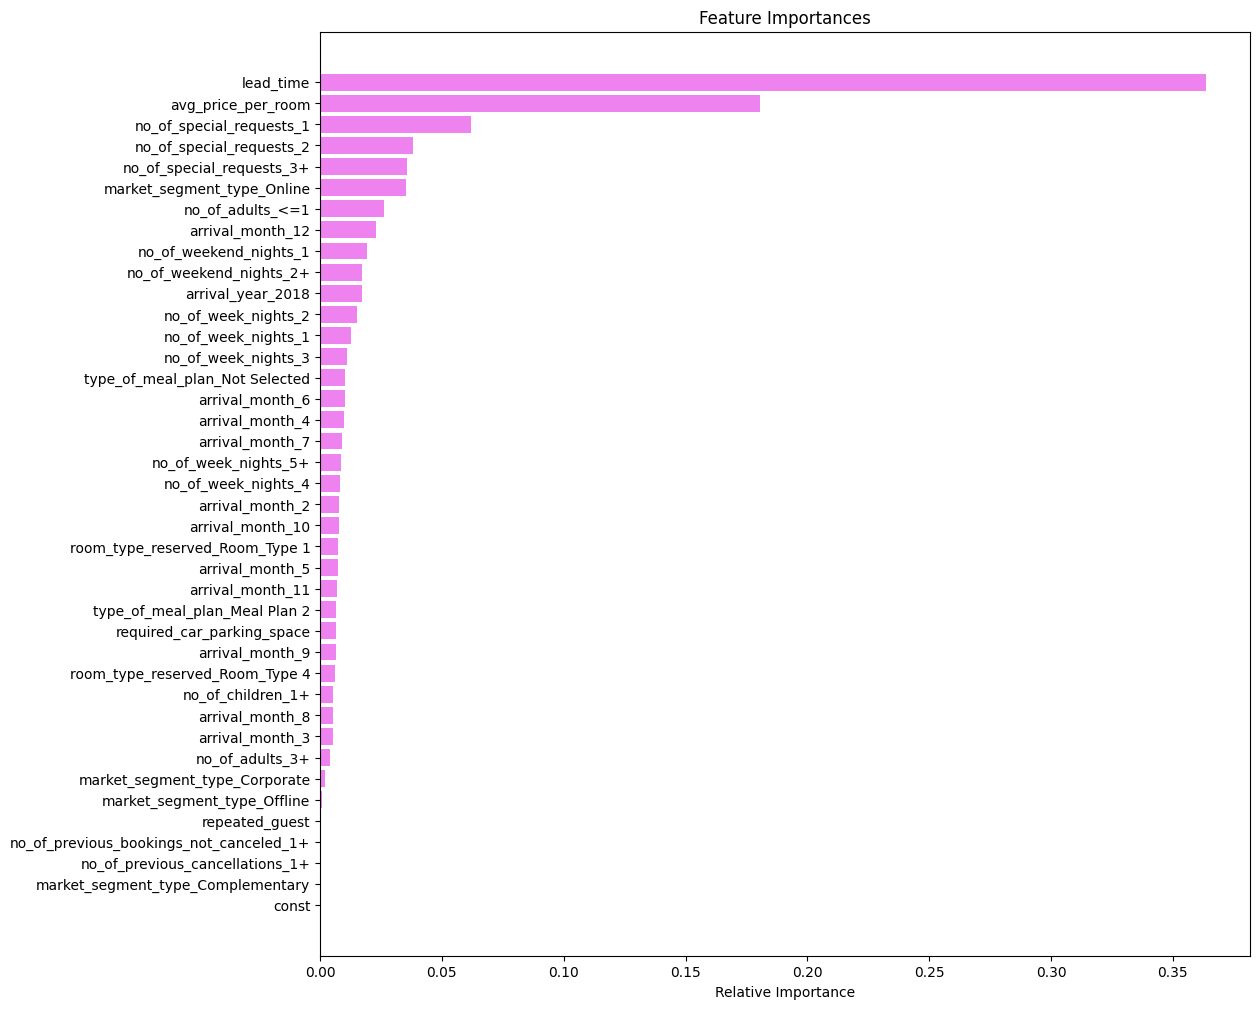

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

Let's first see our model performance for the logistic regression models:

In [ ]:
print("Logistic Regression Training performance:")
models_train_comp_df

Logistic Regression Training performance:


Logistic Regression - default threshold (0.5)  \
Accuracy                                        0.796983   
Recall                                          0.614762   
Precision                                       0.721332   
F1                                              0.663797   

           Logistic Regression- ROC_AUC Optimal Threshold (0.33)  \
Accuracy                                            0.786547       
Recall                                              0.738343       
Precision                                           0.652573       
F1                                                  0.692813       

           Logistic Regression- Recall_Precision_Int Threshold (0.422)  
Accuracy                                            0.797613            
Recall                                              0.689539            
Precision                                           0.689622            
F1                                                  0.689580

In [ ]:
print("Logistic Regression Test performance:")
models_test_comp_df

Logistic Regression Test performance:


Logistic Regression - default threshold (0.5)  \
Accuracy                                        0.800239   
Recall                                          0.619629   
Precision                                       0.735924   
F1                                              0.672787   

           Logistic Regression- ROC_AUC Optimal Threshold (0.33)  \
Accuracy                                            0.790040       
Recall                                              0.734128       
Precision                                           0.666331       
F1                                                  0.698589       

           Logistic Regression- Recall_Precision_Int Threshold (0.422)  
Accuracy                                            0.800698            
Recall                                              0.686720            
Precision                                           0.704494            
F1                                                  0.695493

In [ ]:
# training performance comparison

models_train_comp_df_dt = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df_dt.columns = [
    "Decision Tree",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df_dt

Training performance comparison:


Decision Tree  Decision Tree (Pre-Pruning)  \
Accuracy        0.993659                     0.809192   
Recall          0.983933                     0.707055   
Precision       0.996574                     0.707482   
F1              0.990213                     0.707268   

           Decision Tree (Post-Pruning)  
Accuracy                       0.991848  
Recall                         0.981759  
Precision                      0.993157  
F1                             0.987425

In [ ]:
# test performance comparison

models_test_comp_df_dt = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df_dt.columns = [
    "Decision Tree",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df_dt

Test set performance comparison:


Decision Tree  Decision Tree (Pre-Pruning)  \
Accuracy        0.861619                     0.814665   
Recall          0.795952                     0.700305   
Precision       0.788520                     0.729636   
F1              0.792219                     0.714670   

           Decision Tree (Post-Pruning)  
Accuracy                       0.861987  
Recall                         0.796507  
Precision                      0.789069  
F1                             0.792770

## Actionable Insights and Recommendations


When working with Inn Hotels, I was tasked to understand the data, which factors drive cancellations and how best to predict which customers were more prone to cancel their bookings.

To do so, I explored a series of features that the client and I believe would impact cancellations based on the profile of the guest. With this in mind, I proceeded to not only clean the data, but also develop two classification models: Logistic Regression and Decision Trees, to see which would have the greatest impact in assessing whether a guest would cancel their booking.

This probability of cancellation was measured using recall. Since we were more interested in developing a model that could most predict whether a customer would cancel, we wanted to maximize the true positive rate, which in essence says: of all real positive cases (cancellations), how many did we predict actually cancelled.

When implementing the following data exploration and modeling, I observed the following instances:


*   There were a lot of instance of imbalance when it comes to features. Although this might be due to the nature of the data and bookings, we could strive for better data collection or simply collecting more data.
*   The time horizon goes from 2017 to 2018, it'd be imperative to continue collecting data for future years but also trace back more if possible
*   There might be other potential drawbacks or reasons why one might cancel a booking, so it'd be advisable to survey customers as to why they cancelled the booking.

Now, looking at the model, we can analyze the factors that drive guest cancellations.

I first developed a classification model using Logistic Regression. All the logistic regression models have given a generalized performance on the training and test set. We have been able to build a predictive model that can be used by the hotel to predict whether a guest will cancel their booking.

As aforementioned, the logistic regression model that maximizes our true positive rate is the one that optimizes the ROC-AUC curve with a threshold value of 0.33.

* Coefficient of some levels of number of more than 2 weekend nights, market segment, room type reserved, type of meal plan, lead time and average price are positive, which means that an increase in these or presence of these features  will lead to an increase in chances of a person cancelling their booking.

* Likewise, if: a guest requires parking space, makes special requests, has not made previous cancellations, or the number of adults is not 2, are negative: this means that an increase in these will lead to decrease in chances of a guest cancelling their booking.

I then looked at building decision trees to see which would offer a higher chance of being able to predict guest cancellations. I found that the pre-prunned decision tree offered the combination of greatest recall score and simplicity, for which I decided to use it to evaluate it's score. To do so, I noticed the following.


* Lead time, average price per booking, and having special requests (in that order) are the most important variables in determining if a guest will cancel their booking.

* If the lead time for a customer is more than 151 days and has a room with a booking price greater $100, we should consider this as a potential customer who may cancel their booking.


* Criteria to evaluate whether a guest will cancel a booking according to the decision tree model should depend on three main factors - lead time, average price per booking and whether the customer made special requests.

  * If the customer has made no special requests, has a lead time greater than 151 days and books the room for more tha $100, we could consider this a potential cancellation.

Notwithstanding, we should always take the model findings with caution. Initially, we could expect to increase our data collection or simplify our features in order to enhance our findings. In addition, other factors could be taken into consideration to enhance our model.

